# **CIS 5450 Final Project - Heart Disease Prediction**
*Skyler Zhou, Tianmei Liu, Zoey Cao*

# Part 1. Introduction


In our heart disease prediction project, we delved into the complexities influencing an individual's risk of heart disease. Analyzing a diverse dataset encompassing demographics, lifestyle choices, and medical history, we applied advanced machine learning to unveil patterns and correlations. **Our goal** is to offer a concise yet insightful **exploration of the key determinants of cardiovascular disease**, providing valuable contributions to cardiovascular health research. We welcome any inquiries and we trust our findings will be a valuable resource for healthcare professionals and individuals alike.

# Part 2. Libraries and Dataset Loading

In this section, we import relevant libraries for all following parts of the analysis (data loading, exploratory data analysis, and training models) and also load the data into dataframe.

Here are the main libraries we'll be using:

- **Pandas:** For data manipulation and analysis.
- **Matplotlib, Seaborn, and plotly:** For data visualization.
- **Scikit-learn:** For data preprocessing, model training.

In [47]:
# libraries to install
!pip install sqlalchemy==1.4.46
!pip install pandasql

In [48]:
import warnings
warnings.filterwarnings('ignore')

# data manipulation and fundamental analysis
import numpy as np
import pandas as pd
import pandasql as ps

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go

# Modeling
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

### Please use this [link](https://drive.google.com/file/d/1Ru8IKXC79ujOxnzZo9oOiL-vs1t86iyl/view?usp=drive_link) to download the dataset and upload it in colab

### Original data source: Kaggle - [Cardiovascular Diseases Risk Prediction Dataset](https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset/)

In [49]:
# loading the data into panda dataframe
df = pd.read_csv('CVD_cleaned.csv')

Once data is loaded, we use methods like `head`, `info`, `describe` to get a sense of what the dataset entails.

In [50]:
df.shape

(308854, 19)

In [51]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [53]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [54]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [55]:
#check duplicate values
df.duplicated().sum()
#drop duplicates and reset index
df=df.drop_duplicates().reset_index()

# Part 3. Exploratory Data Analysis


In the Exploratory Data Analysis (EDA) section, we embark on a comprehensive journey through our dataset, unraveling its intricacies and uncovering hidden patterns. Through **univariate analysis**, we individually dissect each variable, gaining insights into their distributions and characteristics. **Multivariate analysis** further enriches our understanding by exploring relationships between pairs of variables, offering insights on potential correlations and dependencies. This section serves as the foundation for subsequent analyses, offering a visual and statistical exploration that guides our exploration of key features and their interactions.


To start off, we would like to briefly describe the dataset we are modeling for heart disease prediction. This **Cardiovascular Disease Risk Prediction Dataset (CDRPD)** is part of a dataset that was originally released by the Centers for Disease Control and Prevention in 2021. The original data was collected via landline and cell phone survey from 49 states of the United States, the District of Columbia, Guam, Puerto Rico, and the US Virgin Islands. The CDRPD dataset contains nineteen dimensions of data recorded from 308854 individuals. Seven variables collected are continuous, whereas the other twelve are categorical.  

### 3.1 Overview

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,308774.0,154414.664195,89159.467843,0.00,77197.25,154411.50,231624.75,308853.00
Height_(cm),308774.0,170.615220,10.658452,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308774.0,83.590399,21.344664,24.95,68.04,81.65,95.25,293.02
BMI,308774.0,28.626813,6.522810,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308774.0,5.097557,8.200434,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308774.0,29.834290,24.877812,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308774.0,15.109517,14.926912,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308774.0,6.297237,8.583837,0.00,2.00,4.00,8.00,128.00


In [57]:
df.describe(include = 'object').T

,count,unique,top,freq
General_Health,308774,5,Very Good,110351
Checkup,308774,5,Within the past year,239295
Exercise,308774,2,Yes,239305
Heart_Disease,308774,2,No,283803
Skin_Cancer,308774,2,No,278782
Other_Cancer,308774,2,No,278897
Depression,308774,2,No,246875
Diabetes,308774,4,No,259062
Arthritis,308774,2,No,207711
Sex,308774,2,Female,160155


In [58]:
# print out unique values in categorical columns
columns = ['General_Health','Checkup','Diabetes','Age_Category']
for col in columns:
    unique_values = df[col].unique()
    print(f"{col}: {', '.join(map(str, unique_values))}")

General_Health: Poor, Very Good, Good, Fair, Excellent
Checkup: Within the past 2 years, Within the past year, 5 or more years ago, Within the past 5 years, Never
Diabetes: No, Yes, No, pre-diabetes or borderline diabetes, Yes, but female told only during pregnancy
Age_Category: 70-74, 60-64, 75-79, 80+, 65-69, 50-54, 45-49, 18-24, 30-34, 55-59, 35-39, 40-44, 25-29


### 3.2 Univariate Analysis

We can see from Section 3.1 that the dataset contains one label variable **Heart_Disease** (Recorded as 'Yes' if participant had been diagnosed of **coronary heart disease or mycardialinfarction**) and eighteen feature variables for the 308854 participants in this Cardiovascular Disease Risk Prediction Dataset. The feature variables can be categorized into three major groups, namely:

* **Demographic**:

1.   Age_Category
2.   Sex
3.   Height_(cm)
4.   Weight_(kg)
5.   BMI



* **Medical History**:

1.   General_Health: Self-rated during survey
2.   Checkup: Time since the most recent routine checkup at the hospital
3.   Skin_Cancer
4.   Other_Cancer
5.   Depression: Recorded 'Yes' if participant had been diagnosed of depression and/or major depression
6.   Diabetes
7.   Arthritis



* **Health Behaviors or Lifestyle**:

1.   Exercise: Exercise activity for the past month of the survey
2.   Fruit_Consumption
3.   Green_Vegetables_Consumption
4.   FriedPotato_Consumption
5.   Smoking_History
6.   Alcohol_Consumption
**Note:** Based on the data provider, the following consumtion is the number of consumption in a month, which is assumed to be in the same measuring system.



To check the overal quality of this dataset, we want to firstly plot each of the univariate variables to see whether they have a reasonable distribution.

In preparation for the upcoming visualizations, we make the following adjustments to enhance visual clarity and interpretability of the graphs.

In [59]:
# make a copy of the original dataframe for plotting purpose
pdf=df.copy()

# revise column values for more concise plotting
pdf['Checkup'] = pdf['Checkup'].replace('Within the past 2 years', '<= 2 years')
pdf['Checkup'] = pdf['Checkup'].replace('Within the past year', '<= 1 year')
pdf['Checkup'] = pdf['Checkup'].replace('Within the past 5 years', '<= 5 years')
pdf['Checkup'] = pdf['Checkup'].replace('5 or more years ago', '>= 5 years')

pdf['Diabetes'] = pdf['Diabetes'].replace('No, pre-diabetes or borderline diabetes', 'No_Prediabetes')
pdf['Diabetes'] = pdf['Diabetes'].replace('Yes, but female told only during pregnancy', 'Yes_Pregnancy_Diabetes')
pdf['Diabetes'] = pdf['Diabetes'].replace('No', 'No_Diabetes')
pdf['Diabetes'] = pdf['Diabetes'].replace('Yes', 'Yes_Diabetes')

In [60]:
# format tick labels to expresses values in thousands for better plot readability.
def thousands_formatter(x, pos):
    return f'{int(x / 1000)}k'

#### Demographic

We'd like to see the spread, trends, outliers and other potential insights in the Sex, Age_Category, Height_(cm), Weight_(kg), and BMI variables.

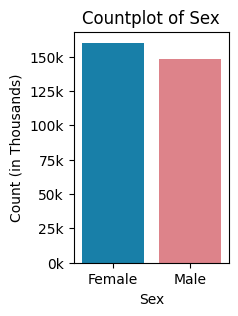

In [61]:
# set color palette
colors = ["#008AC0","#EC747E"]
customPalette = sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(2, 3))
sns.countplot(data=pdf, x='Sex')

# format axes
ax.set_ylabel('Count (in Thousands)')
ax.set_title('Countplot of Sex')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

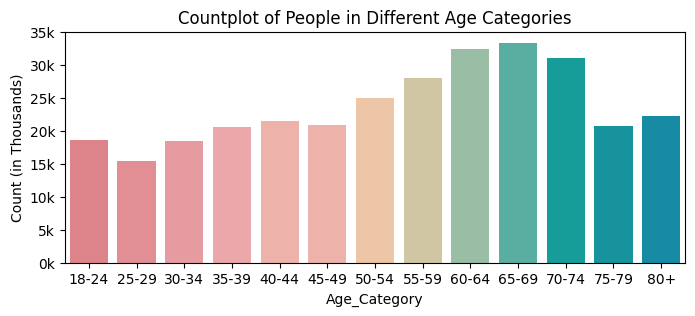

In [62]:
# set up custom color palette
colors = ["#EC747E","#EF818A","#F38E95","#F79CA0","#F8AAA0","#F8AAA0","#F8C59A","#D8CA9C","#93C3A3","#4CBCAA","#00B3B0","#00A6B5","#0099BB"]
customPalette = sns.set_palette(sns.color_palette(colors))

# Countplot of people in different age categories
fig, ax = plt.subplots(figsize=(8, 3))
sns.countplot(ax=ax, data=pdf.sort_values(by=['Age_Category']).reset_index(drop=True), x='Age_Category')

# format axes
ax.set_ylabel('Count (in Thousands)')
ax.set_title('Countplot of People in Different Age Categories')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

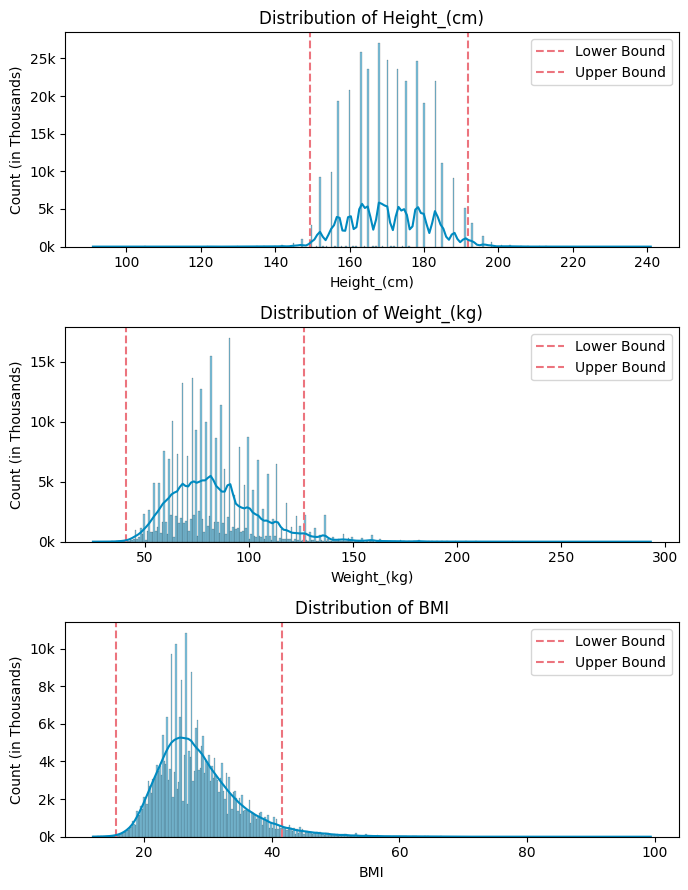

In [63]:
# plots for height, weight, BMI spread
fig, axes = plt.subplots(3, 1, figsize=(7, 9))
pdf_body_index = pdf[['Height_(cm)', 'Weight_(kg)', 'BMI']]

for col, ax in zip(pdf_body_index, axes.flatten()):
  mean = pdf_body_index[col].mean()
  std = pdf_body_index[col].std()
  lower_bound = mean - 2 * std
  upper_bound = mean + 2 * std

  # Plot red lines indicating the outlier bounds in the current subplot
  ax.axvline(x=lower_bound, color='#EC747E', linestyle='--', label='Lower Bound')
  ax.axvline(x=upper_bound, color='#EC747E', linestyle='--', label='Upper Bound')

  # Plot histogram in the current subplot
  sns.histplot(data=pdf_body_index, ax=ax, x=col, kde=True, color="#008AC0")

  # Set labels and title for the current subplot
  ax.set_xlabel(col)
  ax.set_ylabel('Count (in Thousands)')
  ax.set_title(f'Distribution of {col}')
  ax.legend()
  ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

**Takeaway:**

* The ratio of **Sex** is approximately even with slightly more female than male participants.

* The graph depicting the distribution of individuals across different **Age_Category** exhibits a nearly uniform distribution, although the number of participants between age categories of 50-54, 55-59, 60-64, 65-69, and 70-74 are slightly higher than those of other age categories. The graph shows that the number of people in each age category is fairly consistent, indicating a balanced representation across the entire age spectrum.


*   The distribution of **Height**, **Weight**, and **BMI** are mostly uniform, with Weight and BMI slightly right-skewed.

#### Medical History
There are three types of medical history recorded in this dataset: general health, number of checkups in hospital per year, and disease history.




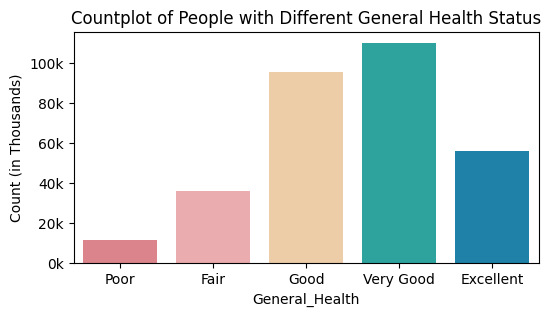

In [64]:
# set color palette
colors = ["#EA7580","#F6A1A5","#F8CD9C","#1BB6AF","#088BBE","#172869"]
customPalette = sns.set_palette(sns.color_palette(colors))

# Countplot of People with Different General Health Status
fig, ax = plt.subplots(figsize=(6, 3))
General_Health_dict = {'Poor':0, 'Fair':1, 'Good':2, 'Very Good':3, 'Excellent':4}
General_Health_pdf = pdf.select_dtypes('object').sort_values(by=['General_Health'], key=lambda x: x.map(General_Health_dict))
sns.countplot(data=General_Health_pdf, x='General_Health')

# format axes
ax.set_title(f'Countplot of People with Different General Health Status')
ax.set_ylabel('Count (in Thousands)')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

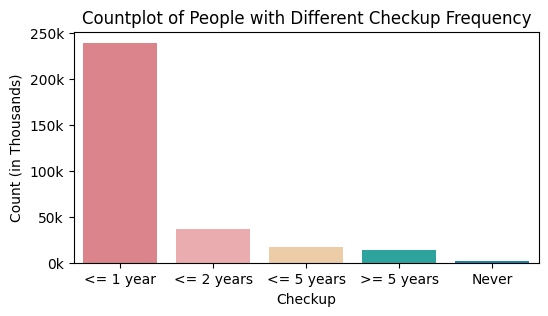

In [65]:
# Countplot of People with Different Checkup Frequency
fig, ax = plt.subplots(figsize=(6, 3))
Checkup_dict = {'Never':0, '>= 5 years':1, '<= 5 years':2, '<= 2 years':3, '<= 1 year':4}
Checkup_pdf = pdf.select_dtypes('object').sort_values(by=['Checkup'], ascending=False, key=lambda x: x.map(Checkup_dict))
sns.countplot(data=Checkup_pdf, x='Checkup')

# format axes
ax.set_title('Countplot of People with Different Checkup Frequency')
ax.set_ylabel('Count (in Thousands)')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

**Takeaway:**

*   The majority of individuals report their **General Health** status as 'Good' 'Very Good', or 'Excellent', which is reasonable.


* The countplot reveals that a substantial number of individuals indicate having had health **Checkup** within the past year or the past two years. This relatively high frequency of checkups in the dataset can imply that the disease history of most participants are up-to-date and reliable. However, the uneven distribution can also indicate that the dataset is not an ideal sample of the entire population, but a sample of the population who are willing and can afford to go to the hospital more often.

The dataset recorded six types of diseases history including Arthritis, Depression, Diabetes, Skin_Cancer, Other_Cancer, and Heart_Disease. Note that all except the 'Diabetes' variables contains boolean values of 'Yes' and 'No'. The Diabetes is divided more finely than the others, containing four values including 'No_Diabetes', 'No_Prediabetes', 'Yes_Pregnancy_Diabetes', and 'Yes_Diabetes'. We will firstly examine the distribution of all four values in the Diabetes column, and then encode them into boolean values to be compared with other diseases.

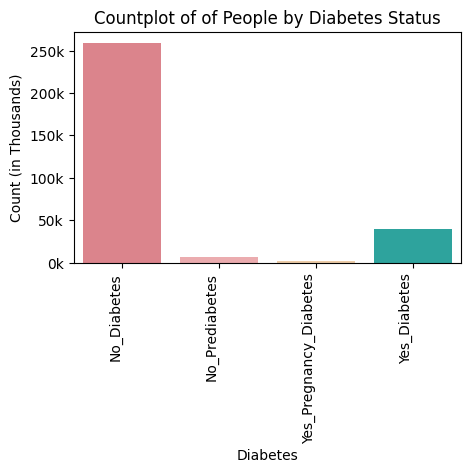

In [66]:
# Countplot of of People Diagnosed with Diabetes
fig, ax = plt.subplots(figsize=(5, 3))
Diabetes_dict = {'No_Diabetes':0, 'No_Prediabetes':1, 'Yes_Pregnancy_Diabetes':2, 'Yes_Diabetes':3}
Diabetes_pdf = pdf.select_dtypes('object').sort_values(by=['Diabetes'], ascending=True, key=lambda x: x.map(Diabetes_dict))
sns.countplot(data=Diabetes_pdf, x='Diabetes')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# format axes
ax.set_title('Countplot of of People by Diabetes Status')
ax.set_ylabel('Count (in Thousands)')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

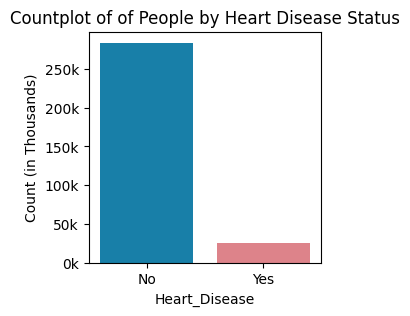

In [67]:
# set color palette
colors = ["#008AC0","#EC747E"]
customPalette = sns.set_palette(sns.color_palette(colors))

# Countplot of of People Diagnosed with Diabetes
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(pdf, x='Heart_Disease')

# format axes
ax.set_title('Countplot of of People by Heart Disease Status')
ax.set_ylabel('Count (in Thousands)')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

In [68]:
# encode the four values ('No_Diabetes', 'No_Prediabetes', 'Yes_Pregnancy_Diabetes', and 'Yes_Diabetes') in Diabetes column into two values
disease = ['Arthritis', 'Depression', 'Diabetes', 'Skin_Cancer', 'Other_Cancer', 'Heart_Disease']
pdf_disease = df[disease]
pdf_disease['Diabetes'] = np.where(
                          (pdf_disease['Diabetes'] == 'Yes') |
                          (pdf_disease['Diabetes'] == 'Yes, but female told only during pregnancy'),
                          'Yes',
                          'No')

# count number of diseased and healthy people within each disease category
yes_count = [pdf_disease[d].value_counts()['Yes'] for d in disease]
no_count = [pdf_disease[d].value_counts()['No'] for d in disease]

# plot a horizontal barplot using plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    y=disease,
    x=yes_count,
    name='Diseased',
    orientation='h',
    marker=dict(
        color='rgba(247, 156, 160, 0.8)',
        line=dict(color='rgba(247, 156, 160, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=disease,
    x=no_count,
    name='Healthy',
    orientation='h',
    marker=dict(
        color='rgba(0, 54, 75, 0.8)',
        line=dict(color='rgba(0, 54, 75, 1.0)', width=3)
    )
))

fig.update_layout(title='Number of Diseased and Healthy People in each Disease Category',
                  yaxis_title='Disease Type',
                  xaxis_title='Number of People',
                  barmode='stack')
fig.show()

**Takeaway:**

* On a per-disease basis, the numbers of diagnosed and healthy people are not evenly distributed. The number of diseased people are significantly lower than that of the healthy people, and this uneven distribution is expecially evident within the Heart_Disease category. Although we would expect the population to have smaller porpotion of diseased people, the unevenness could impact the later modeling.

* Globally, we can see that Arthritis is the most prevalent disease within the dataset, whereas Heart_Disease is the least common one. This result meets our expectation as Heart Disease. Albeit its high mortality rate, the prevalence of heart disease is relatively low compared to the other five.

#### Health Behaviors

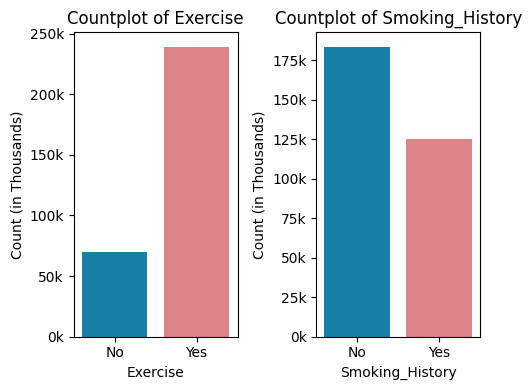

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(5,4))
pdf_categorical = pdf[['Exercise','Smoking_History']].sort_values(by=['Exercise','Smoking_History'])

for col, ax in zip(pdf_categorical, axes.flatten()):
  sns.countplot(data=pdf_categorical, ax=ax, x=col)

  # format axes
  ax.set_xlabel(col)
  ax.set_ylabel('Count (in Thousands)')
  ax.set_title(f'Countplot of {col}')
  ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

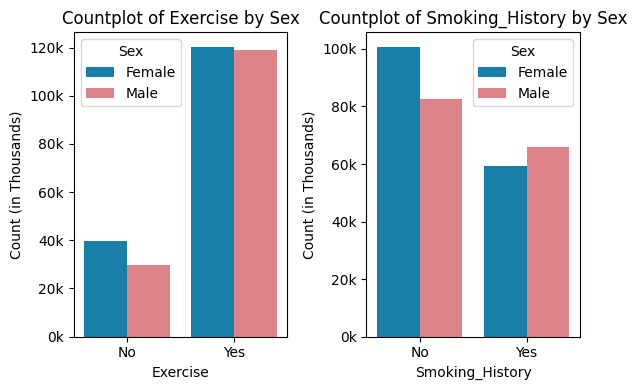

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(6,4))

for col, ax in zip(pdf_categorical, axes.flatten()):
  sns.countplot(data=pdf.sort_values(by=['Exercise','Smoking_History']), ax=ax, x=col, hue='Sex')

  # format axes
  ax.set_xlabel(col)
  ax.set_ylabel('Count (in Thousands)')
  ax.set_title(f'Countplot of {col} by Sex')
  ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

**Takeaway:**

* The majority of people reported that they do **exercise**, while more than a half people claimed that don't have a **smoking history**. Since Smoking is stereotypically positively correlated with male, we plot the number of people who had a smoking history by sex. The plot, however, suggests that the ratio of female and male smokers are approximately the same. We also plot the number of exercisers by sex, which also indicates an even distribution.

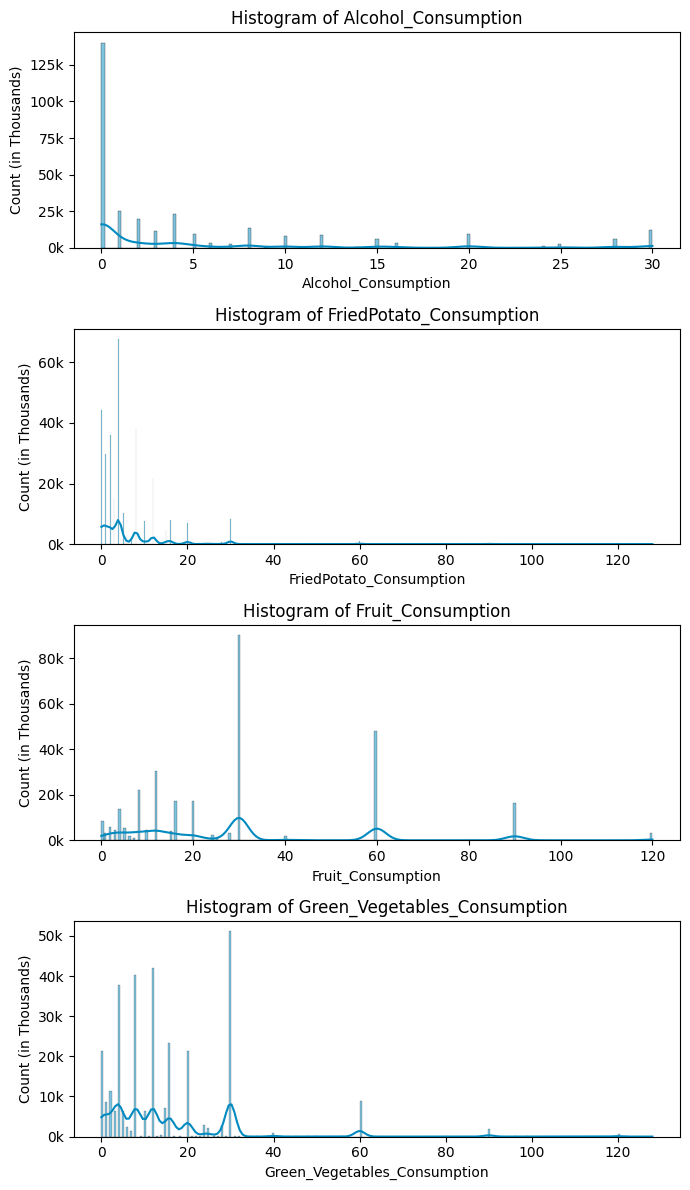

In [71]:
# plots for alcohol consumption, fruit consumption, green vegie consumtion and freid potato consumption
fig, axes = plt.subplots(4, 1, figsize=(7, 12))
pdf_consumption = pdf[['Alcohol_Consumption', 'FriedPotato_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption']].astype(int)

for col, ax in zip(pdf_consumption, axes.flatten()):
  # Plot countplots in the current subplot
  sns.histplot(data=pdf_consumption, ax=ax, x=col, kde=True, color="#008AC0")

  # Set labels and title for the current subplot
  ax.set_xlabel(col)
  ax.set_ylabel('Count (in Thousands)')
  ax.set_title(f'Histogram of {col}')
  ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

**Takeaway:**

*   In interpreting the **alcohol consumption** countplot, the peak on value zero reveals that the majority of people does not consume alcohol. However, the presence of a few outliers also indicates a small subset of the population engaging in notably higher alcohol intake.


*   The **fried potato consumption** feature is also right-skewed, showing that many people consume fried potatoes less frequently.


*   The distribution of **green vegetable comsumption** is quite similar to **fruit consumtion** (both right-skewed).

*   Since fried potato, green vegetable, and fruit can all be categorized into food, we engineered these three features into one new variable **healthy diet score** and plotted it. To make the mean centered around zero, we put more weight on the one junk food and less weight on the two healthy food. The positive mean and right skew as shown in the histogram shows that this population has a relatively healthy diet.

## 3.3 Multivariate Analysis


### 3.3.1 Risk Factors for Heart Disease

In this section, we aim to analyze the relationship between the heart disease and each features. We seek trends and pattern in the plots for potential risk factors influencing the status of heart disease.

Instead of plotting the count of both diseased and healthy people in relation to each of the features, we decided to plot the percentage of only the people diagnosed of heart disease within feature subcategory. In other words, we want to plot the percentage of diseased people given, for example, their sex as female or male to better visualize how each feature might influence the onset of heart disease.

#### Heart_Disease Status in Relation to Demographic

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

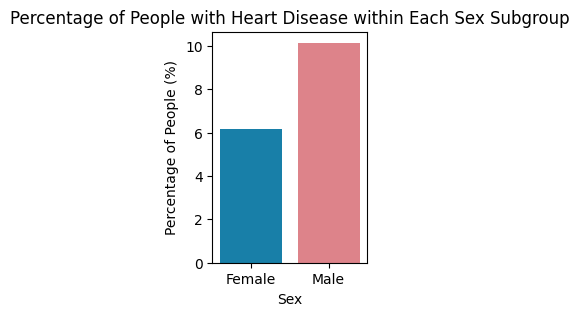

In [72]:
fig, ax = plt.subplots(figsize=(2, 3))

# generate pc_by_sex containing percentage of people diagnosed with heart disease in the female and male subgroups of sex
percent = pdf.groupby('Sex', as_index=False)['Heart_Disease'].value_counts(normalize=True)
pc_by_sex = pd.DataFrame(percent)
pc_by_sex = pc_by_sex[pc_by_sex['Heart_Disease'] == 'Yes']
pc_by_sex['Percentage'] = pc_by_sex['proportion'] * 100

# create barplot
g = sns.barplot(x=pc_by_sex['Sex'].tolist(), y=pc_by_sex['Percentage'].tolist())
ax.set_xlabel('Sex')
ax.set_ylabel('Percentage of People (%)')
ax.set_title('Percentage of People with Heart Disease within Each Sex Subgroup')
g.set_xticklabels(['Female', 'Male'])

[(0.0, 25.0)]

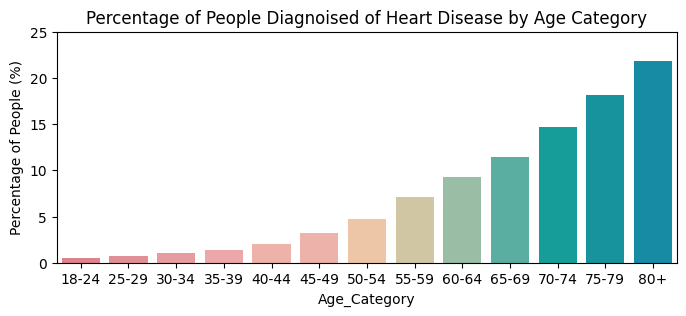

In [73]:
# set color palette
colors = ["#EC747E","#EF818A","#F38E95","#F79CA0","#F8AAA0","#F8AAA0","#F8C59A","#D8CA9C","#93C3A3","#4CBCAA","#00B3B0","#00A6B5","#0099BB"]
customPalette = sns.set_palette(sns.color_palette(colors))

# calculate the percentage of people with Heart_Disease == 'Yes' in each Age_Category subgroup
data = pdf.sort_values(by='Age_Category').groupby('Age_Category', as_index=False)['Heart_Disease'].value_counts(normalize=True)
pc_by_age = pd.DataFrame(data)
pc_by_age = pc_by_age[pc_by_age['Heart_Disease'] == 'Yes']
pc_by_age['Percentage'] = pc_by_age['proportion'] * 100

# plot barplot
fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=pc_by_age['Age_Category'].to_list(), y=pc_by_age['Percentage'].to_list())

# format axis
ax.set_title('Percentage of People Diagnoised of Heart Disease by Age Category')
ax.set_ylabel('Percentage of People (%)')
ax.set_xlabel('Age_Category')
ax.set(ylim=(0, 25))

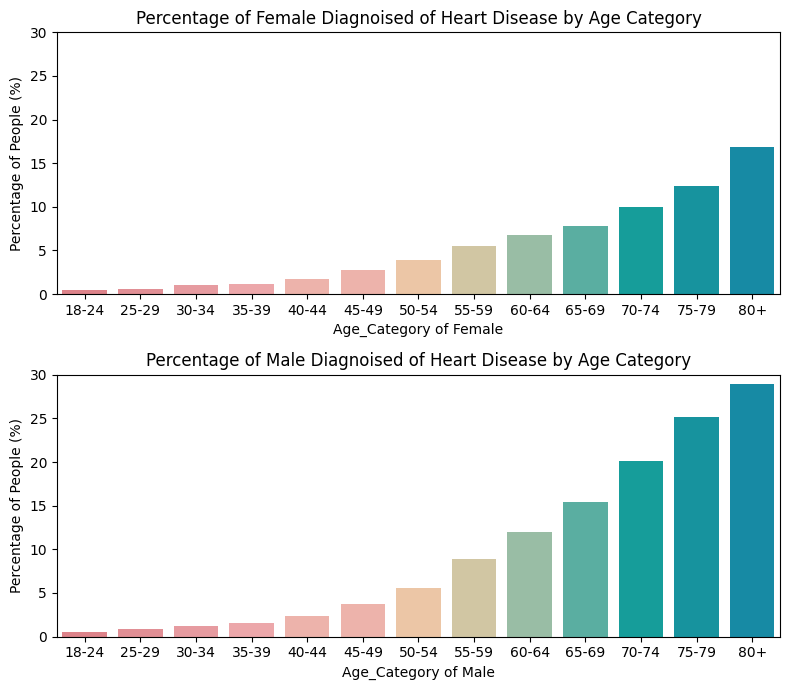

In [74]:
# calculate the percentage of female with Heart_Disease == 'Yes' in each Age_Category subgroup
female_pdf = pdf[pdf['Sex'] == 'Female']
data = female_pdf.sort_values(by='Age_Category').groupby('Age_Category', as_index=False)['Heart_Disease'].value_counts(normalize=True)
pc_by_age_female = pd.DataFrame(data)
pc_by_age_female = pc_by_age_female[pc_by_age_female['Heart_Disease'] == 'Yes']
pc_by_age_female['Percentage'] = pc_by_age_female['proportion'] * 100

# calculate the percentage of male with Heart_Disease == 'Yes' in each Age_Category subgroup
male_pdf = pdf[pdf['Sex'] == 'Male']
data = male_pdf.sort_values(by='Age_Category').groupby('Age_Category', as_index=False)['Heart_Disease'].value_counts(normalize=True)
pc_by_age_male = pd.DataFrame(data)
pc_by_age_male = pc_by_age_male[pc_by_age_male['Heart_Disease'] == 'Yes']
pc_by_age_male['Percentage'] = pc_by_age_male['proportion'] * 100

# plot barplot
pcs = [pc_by_age_female, pc_by_age_male]
xlabels = ['Female', 'Male']
fig, axes = plt.subplots(2, 1, figsize=(8, 7))
for pc, ax, xlabel in zip(pcs, axes.flatten(), xlabels):
  sns.barplot(x=pc['Age_Category'].to_list(), y=pc['Percentage'].to_list(), ax=ax)

  # format axis
  ax.set_title(f'Percentage of {xlabel} Diagnoised of Heart Disease by Age Category')
  ax.set_ylabel('Percentage of People (%)')
  ax.set_xlabel(f'Age_Category of {xlabel}')
  ax.set(ylim=(0, 30))

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


**Takeaway**:

* The percentage of people with heart disease in male is higher than it in female. This discrepancy in **sex** is consistent with the situation in the reality. We also plotted the percentage of heart disease patients in different age category seperately for female and male. We found that not only the percentage of male patients are higher in all the age categories, but also the percentage of male heart disease carrier rises sharply from the age of 55.

* There is a clear trend for more occurance of Heart Disease in the elder **age categories**, with the most common in the 80+ age category. This trend is reasonable as both coronary heart disease and mycardialinfarction are physiological age-associated.

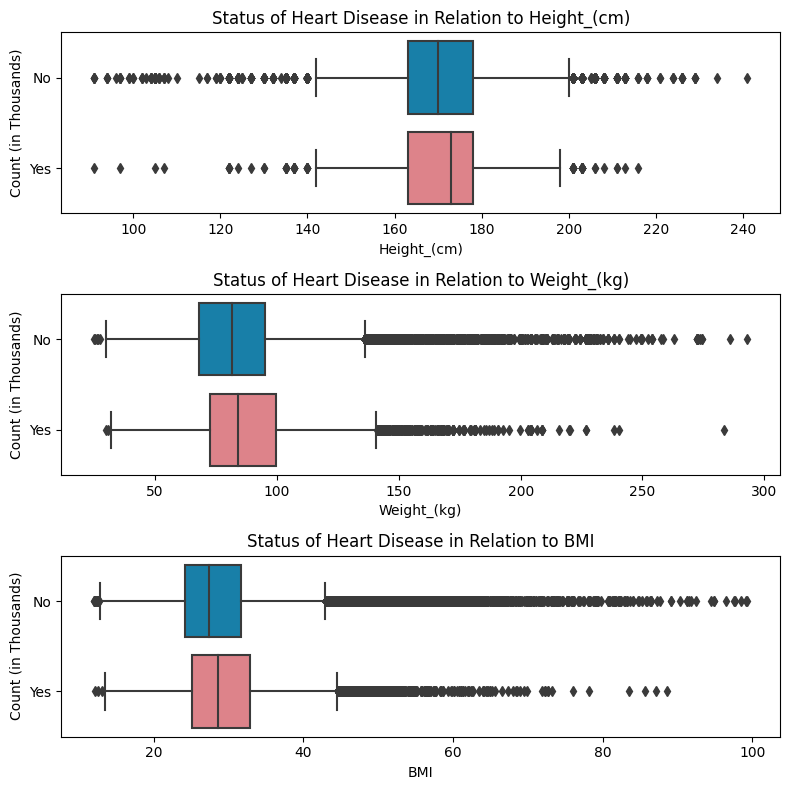

In [75]:
# set color palette
colors = ["#008AC0","#EC747E"]
customPalette = sns.set_palette(sns.color_palette(colors))

# create pdf_body_index dataframe from pdf to iterate the plotting
fig, axes = plt.subplots(3, 1, figsize=(8, 8))
pdf_body_index = pdf[['Height_(cm)', 'Weight_(kg)', 'BMI', 'Heart_Disease']]

# plots for height, weight, BMI spread
for col, ax in zip(pdf_body_index, axes.flatten()):

  # Plots
  sns.boxplot(data=pdf_body_index, ax=ax, x=col, y ='Heart_Disease')

  # Set labels and title for the current subplot
  ax.set_xlabel(col)
  ax.set_ylabel('Count (in Thousands)')
  ax.set_title(f'Status of Heart Disease in Relation to {col}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

**Takeaway**:

* Heart Disease is slightly more common among people with higher **weight and BMI**. Although the mean of **height** for people with heart disease is slightly higher than the mean of the healthy population, there is no clear difference for the height of the two groups.


####Heart_Disease Status in Relation to Medical History

Text(0.5, 0, 'General Health')

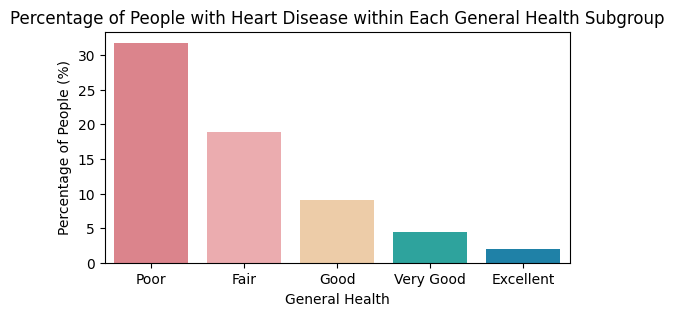

In [76]:
# set color palette
colors = ["#EA7580","#F6A1A5","#F8CD9C","#1BB6AF","#088BBE","#172869"]
customPalette = sns.set_palette(sns.color_palette(colors))

# calculate the percentage of people with Heart_Disease == 'Yes' in each General_Health subgroup
data = pdf.groupby('General_Health', as_index=False)['Heart_Disease'].value_counts(normalize=True)
pc_health_hd = pd.DataFrame(data)
pc_health_hd = pc_health_hd[pc_health_hd['Heart_Disease'] == 'Yes'].sort_values(by=['General_Health'], key=lambda x: x.map(General_Health_dict))
pc_health_hd['Percentage'] = pc_health_hd['proportion'] * 100

# plot barplot
fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x=pc_health_hd['General_Health'].to_list(), y=pc_health_hd['Percentage'].to_list())

# format axes
ax.set_title('Percentage of People with Heart Disease within Each General Health Subgroup')
ax.set_ylabel('Percentage of People (%)')
ax.set_xlabel('General Health')

Text(0.5, 0, 'Frequency of Checkup')

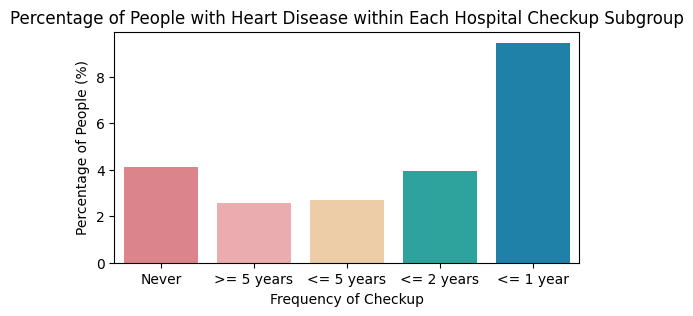

In [77]:
# calculate the percentage of people with Heart_Disease == 'Yes' in each Hospital Checkup subgroup
data = pdf.groupby('Checkup', as_index=False)['Heart_Disease'].value_counts(normalize=True)
pc_checkup_hd = pd.DataFrame(data)
pc_checkup_hd = pc_checkup_hd[pc_checkup_hd['Heart_Disease'] == 'Yes'].sort_values(by=['Checkup'], key=lambda x: x.map(Checkup_dict))
pc_checkup_hd['Percentage'] = pc_checkup_hd['proportion'] * 100

# plot barplot
fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x=pc_checkup_hd['Checkup'].to_list(), y=pc_checkup_hd['Percentage'].to_list())

# format axes
ax.set_title('Percentage of People with Heart Disease within Each Hospital Checkup Subgroup')
ax.set_ylabel('Percentage of People (%)')
ax.set_xlabel('Frequency of Checkup')

**Takeaway:**

* Heart Disease onset increases more common as patients' **general health** status decreases.

* It is worthy to note that people with more **Checkups** are more likely to be dignosed with Heart Disease. This initially seemed counter-intutive to us, as we thought the people who do checkups more routinely at the hospital should be more healthy. However, on the flip side, it is also possible that people who feel less comfortable and therefore are potential diseased tend visit the hospital more. Also, people who visit the hospital more often and perform more medical examination are more likely to be diagnosed of disease, whereas people who conduct less checkups may have diseases developed but not yet diagnosed.  



Similar to the plots in 3.2 Univariate Analysis, becuase the diabetes has four instead of two boolean values, we decided to firstly find the percentage of people diagnosed of heart disease in each of the diabetes subcategories. Then, we mapped 'No_Diabetes' and 'No_Prediabetes' into 'No' and encoded 'Yes_Pregnancy_Diabetes' and 'Yes_Diabetes' into 'Yes'. The horizontal barplot was used to present and compare the percentage of heart disease carriers that had at least one of the five accompanying diseases.

[(0.0, 22.0)]

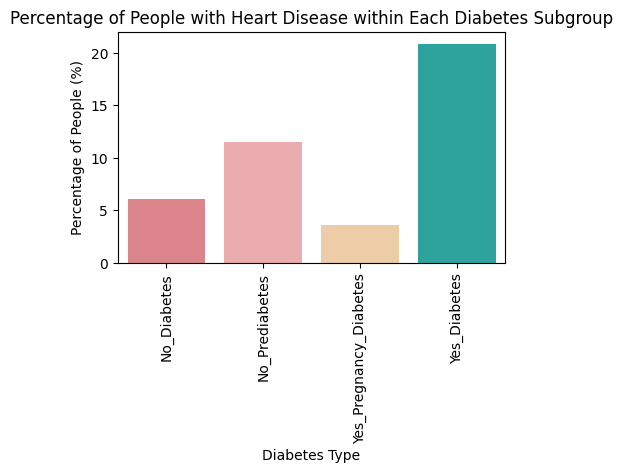

In [78]:
# calculate the percentage of people with Heart_Disease == 'Yes' in each Diabetes subgroup
data = pdf.groupby('Diabetes', as_index=False)['Heart_Disease'].value_counts(normalize=True)
pc_diabetes_hd = pd.DataFrame(data)
pc_diabetes_hd = pc_diabetes_hd[pc_diabetes_hd['Heart_Disease'] == 'Yes'].sort_values(by=['Diabetes'], key=lambda x: x.map(Diabetes_dict))
pc_diabetes_hd['Percentage'] = pc_diabetes_hd['proportion'] * 100

# plot barplot
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x=pc_diabetes_hd['Diabetes'].to_list(), y=pc_diabetes_hd['Percentage'].to_list())

# format axes
ax.set_title('Percentage of People with Heart Disease within Each Diabetes Subgroup')
ax.set_ylabel('Percentage of People (%)')
ax.set_xlabel('Diabetes Type')
ax.tick_params(axis='x', rotation=90)
ax.set(ylim=(0, 22))

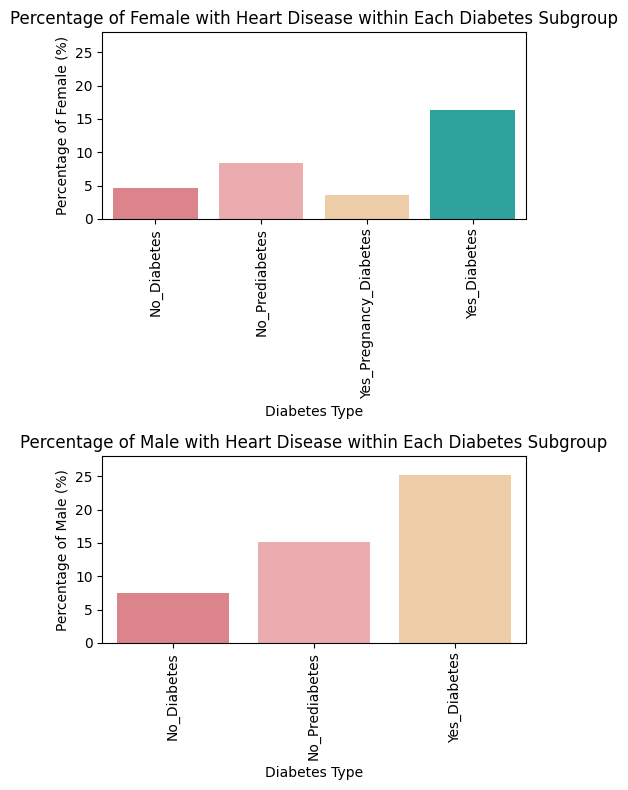

In [79]:
# calculate the percentage of female with Heart_Disease == 'Yes' in each Diabetes subgroup
pdf_female = pdf[pdf['Sex'] == 'Female']
data = pdf_female.groupby('Diabetes', as_index=False)['Heart_Disease'].value_counts(normalize=True)
pc_diabetes_hd_female = pd.DataFrame(data)
pc_diabetes_hd_female = pc_diabetes_hd_female[pc_diabetes_hd_female['Heart_Disease'] == 'Yes'].sort_values(by=['Diabetes'], key=lambda x: x.map(Diabetes_dict))
pc_diabetes_hd_female['Percentage'] = pc_diabetes_hd_female['proportion'] * 100

# calculate the percentage of male with Heart_Disease == 'Yes' in each Diabetes subgroup
pdf_female = pdf[pdf['Sex'] == 'Male']
data = pdf_female.groupby('Diabetes', as_index=False)['Heart_Disease'].value_counts(normalize=True)
pc_diabetes_hd_male = pd.DataFrame(data)
pc_diabetes_hd_male = pc_diabetes_hd_male[pc_diabetes_hd_male['Heart_Disease'] == 'Yes'].sort_values(by=['Diabetes'], key=lambda x: x.map(Diabetes_dict))
pc_diabetes_hd_male['Percentage'] = pc_diabetes_hd_male['proportion'] * 100

# plot barplot
pcs = [pc_diabetes_hd_female, pc_diabetes_hd_male]
xlabels = ['Female', 'Male']
fig, axes = plt.subplots(2, 1, figsize=(5, 8))
for pc, ax, xlabel in zip(pcs, axes.flatten(), xlabels):
  sns.barplot(x=pc['Diabetes'].to_list(), y=pc['Percentage'].to_list(), ax=ax)

  # format axes
  ax.set_title(f'Percentage of {xlabel} with Heart Disease within Each Diabetes Subgroup')
  ax.set_ylabel(f'Percentage of {xlabel} (%)')
  ax.set_xlabel('Diabetes Type')
  ax.tick_params(axis='x', rotation=90)
  ax.set(ylim=(0, 28))

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

**Takeaway**
* We can see from the 'Percentage of People with Heart Disease within Each **Diabetes** Subgroup' that people labeled as 'Yes_Diabetes' and 'No_Prediabetes' has a higher percentage of heart disease symptom than those without diabetes. However, it is to our surprise that those labeled as 'Yes_Pregnancy_Diabetes' has the least percentage of people diagnosed of heart disease among the four groups. According to what we have found in the previous section 'Heart_Disease Status in Relation to Demographic', sex and age may influence development of heart disease. Therefore, the huge difference of heart disease rate between those who has diabetes and those with pregnany diabetes may be due to the fact that the later group is female who are in a relatively young age group.
* We plot the percentage of female and male with heart disease by diabete types. In the two plots with the same axis, we can clearly see that the percentages of women heart disease carrier are indeed smaller than that of the men. Also, in the male plot, there is a clear trend that the percentage of heart disease patients increases as diabete condition exacerbates.
* However, it is worthy to note that in the above plots, we did not condition on the number of disease, which means that people with diabetes can also have arthritis and depression. The interaction of diseases can be intricate. Therefore, we would like to condition on only one accompanying disease next.

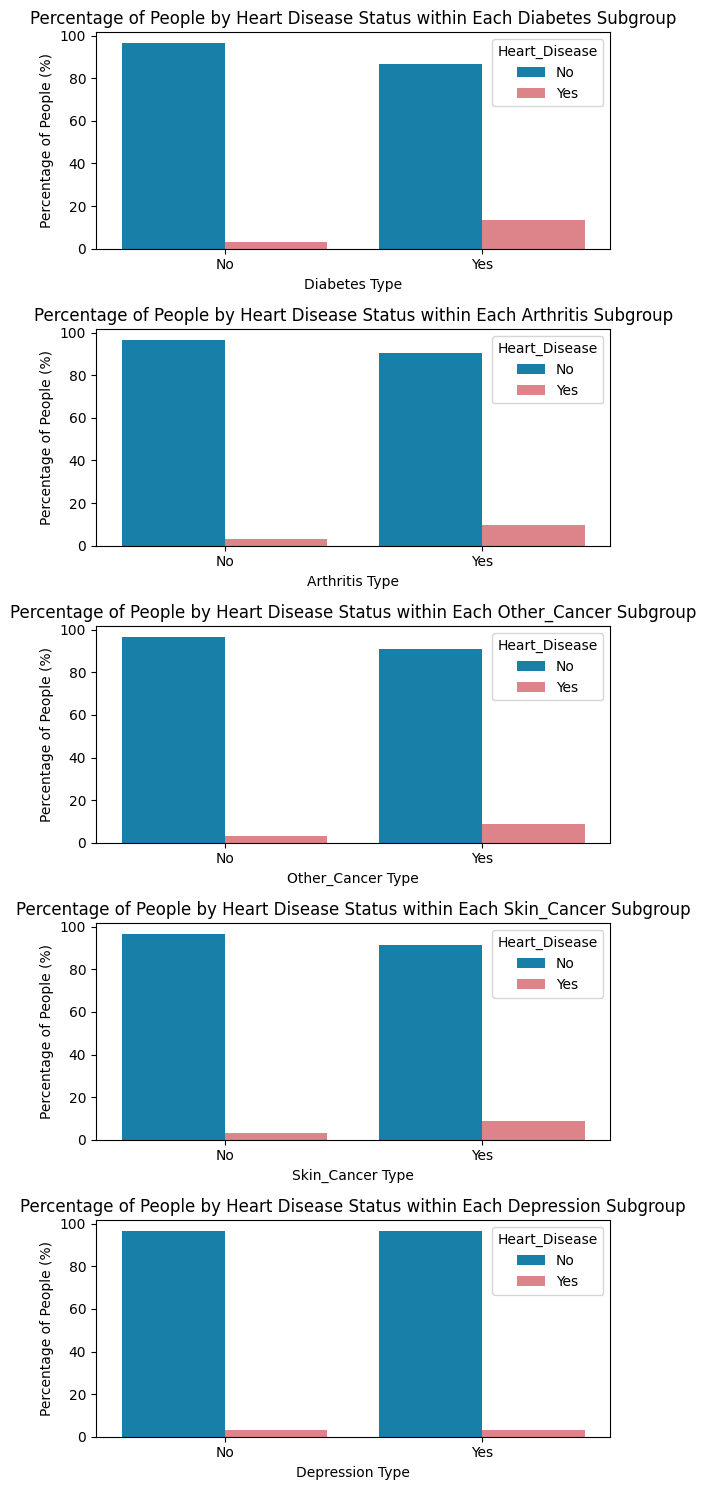

In [80]:
# set color palette
colors = ["#008AC0","#EC747E"]
customPalette = sns.set_palette(sns.color_palette(colors))

# condition on diabetes as the only accompanying disease
pdf_diabetes = pdf_disease.loc[(pdf_disease['Depression'] == 'No') & (pdf_disease['Skin_Cancer'] == 'No') & (pdf_disease['Other_Cancer'] == 'No') & (pdf_disease['Arthritis'] == 'No')]
pdf_diabetes = pdf_diabetes.groupby(['Diabetes'], as_index=False)['Heart_Disease'].value_counts(normalize=True)
pdf_diabetes['Percentage'] = pdf_diabetes['proportion'] * 100

# condition on arthritis as the only accompanying disease
pdf_arthritis = pdf_disease.loc[(pdf_disease['Diabetes'] == 'No') & (pdf_disease['Depression'] == 'No') & (pdf_disease['Other_Cancer'] == 'No') & (pdf_disease['Skin_Cancer'] == 'No')]
pdf_arthritis = pdf_arthritis.groupby(['Arthritis'], as_index=False)['Heart_Disease'].value_counts(normalize=True)
pdf_arthritis['Percentage'] = pdf_arthritis['proportion'] * 100

# condition on depression as the only accompanying disease
pdf_depression = pdf_disease.loc[(pdf_disease['Diabetes'] == 'No') & (pdf_disease['Skin_Cancer'] == 'No') & (pdf_disease['Other_Cancer'] == 'No') & (pdf_disease['Arthritis'] == 'No')]
pdf_depression = pdf_depression.groupby(['Depression'], as_index=False)['Heart_Disease'].value_counts(normalize=True)
pdf_depression['Percentage'] = pdf_depression['proportion'] * 100

# condition on skin_cancer as the only accompanying disease
pdf_skin_cancer = pdf_disease.loc[(pdf_disease['Diabetes'] == 'No') & (pdf_disease['Depression'] == 'No') & (pdf_disease['Other_Cancer'] == 'No') & (pdf_disease['Arthritis'] == 'No')]
pdf_skin_cancer = pdf_skin_cancer.groupby(['Skin_Cancer'], as_index=False)['Heart_Disease'].value_counts(normalize=True)
pdf_skin_cancer['Percentage'] = pdf_skin_cancer['proportion'] * 100

# condition on other_cancer as the only accompanying disease
pdf_other_cancer = pdf_disease.loc[(pdf_disease['Diabetes'] == 'No') & (pdf_disease['Depression'] == 'No') & (pdf_disease['Skin_Cancer'] == 'No') & (pdf_disease['Arthritis'] == 'No')]
pdf_other_cancer = pdf_other_cancer.groupby(['Other_Cancer'], as_index=False)['Heart_Disease'].value_counts(normalize=True)
pdf_other_cancer['Percentage'] = pdf_other_cancer['proportion'] * 100

# plot barplot
pcs = [pdf_diabetes, pdf_arthritis, pdf_other_cancer, pdf_skin_cancer, pdf_depression ]
xlabels = ['Diabetes', 'Arthritis', 'Other_Cancer', 'Skin_Cancer', 'Depression' ]
fig, axes = plt.subplots(5, 1, figsize=(6, 15))
for pc, ax, xlabel in zip(pcs, axes.flatten(), xlabels):
  sns.barplot(x=pc[xlabel].to_list(), y=pc['Percentage'].to_list(), hue=pc['Heart_Disease'], ax=ax)

  # format axes
  ax.set_title(f'Percentage of People by Heart Disease Status within Each {xlabel} Subgroup')
  ax.set_ylabel(f'Percentage of People (%)')
  ax.set_xlabel(f'{xlabel} Type')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Disease Type')

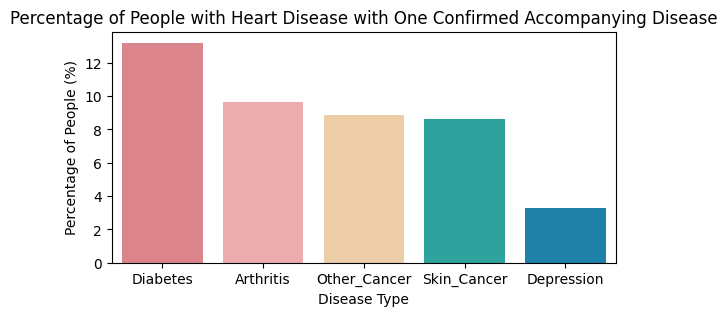

In [81]:
# set color palette
colors = ["#EA7580","#F6A1A5","#F8CD9C","#1BB6AF","#088BBE","#172869"]
customPalette = sns.set_palette(sns.color_palette(colors))

pc_diabetes = pdf_diabetes.iloc[3]['Percentage']
pc_arthritis = pdf_arthritis.iloc[3]['Percentage']
pc_other_cancer = pdf_other_cancer.iloc[3]['Percentage']
pc_skin_cancer = pdf_skin_cancer.iloc[3]['Percentage']
pc_depression = pdf_depression.iloc[3]['Percentage']

pdf_hd_disease = pd.DataFrame(
    {
     'Accompanying_Diseases': ['Diabetes', 'Arthritis', 'Other_Cancer', 'Skin_Cancer', 'Depression'],
     'Percentage': [pc_diabetes, pc_arthritis, pc_other_cancer, pc_skin_cancer, pc_depression]
    }
)

fig, ax = plt.subplots(figsize=(6.5, 3))
sns.barplot(x=pdf_hd_disease['Accompanying_Diseases'].to_list(), y=pdf_hd_disease['Percentage'].to_list())

# format axes
ax.set_title('Percentage of People with Heart Disease with One Confirmed Accompanying Disease')
ax.set_ylabel('Percentage of People (%)')
ax.set_xlabel('Disease Type')

**Takeaway**

* Heart disease is most likely to happen with accompanying diabetes and least likely with depression.

In the previous section, we explored how a singular accompanying disease may affect the development of heart disease. In this next section, we are interested to understand the risk posed by both the combination of diseases and the number of the accompanying diseases. We will achieve this through SQL and JOIN.

In [82]:
# Use SQL to find the most common combination of diseases
common_disease_query = '''
SELECT Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Diabetes, Arthritis, COUNT(*) AS count
FROM pdf_disease
WHERE (CASE WHEN Heart_Disease = 'Yes' THEN 1 ELSE 0 END +
       CASE WHEN Skin_Cancer = 'Yes' THEN 1 ELSE 0 END +
       CASE WHEN Other_Cancer = 'Yes' THEN 1 ELSE 0 END +
       CASE WHEN Depression = 'Yes' THEN 1 ELSE 0 END +
       CASE WHEN Diabetes = 'Yes' THEN 1 ELSE 0 END +
       CASE WHEN Arthritis = 'Yes' THEN 1 ELSE 0 END) >= 2
GROUP BY Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Diabetes, Arthritis
ORDER BY count DESC
'''
common_disease_result = ps.sqldf(common_disease_query, locals())
common_disease_result.head(3)

,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,count
0,No,No,No,Yes,No,Yes,14066
1,No,No,No,No,Yes,Yes,7862
2,No,Yes,No,No,No,Yes,6287


In [83]:
# Use SQL find the most common combination with heart disease
common_heart_disease_combo_query = '''
SELECT Skin_Cancer, Other_Cancer, Depression, Diabetes, Arthritis, COUNT(*) AS count
FROM pdf_disease
WHERE Heart_Disease = 'Yes'
  AND (Skin_Cancer = 'Yes' OR
  Other_Cancer = 'Yes' OR
  Depression = 'Yes' OR
  Diabetes = 'Yes' OR
  Arthritis = 'Yes')
GROUP BY Skin_Cancer, Other_Cancer, Depression, Diabetes, Arthritis
ORDER BY count DESC
'''
common_heart_disease_combo_result = ps.sqldf(common_heart_disease_combo_query, locals())
common_heart_disease_combo_result.head(3)

,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,count
0,No,No,No,No,Yes,4195
1,No,No,No,Yes,Yes,2165
2,No,No,No,Yes,No,1926


**Takeaway**
* In common_disease_result, we found that the number of disease combination occurance is highest for depression and arthritis, arthritis and diabetes, and arthritis and skin cancer. This is expected since in the 3.2 Medical History section, we discovered that arthritis is the most common disease across the dataset.
* In the common_heart_disease_combo_result, we again found that the combination of arthritis appeared as the highest number of accompanying disease concuring with heart disease. This does not necessarily indicates a correlation between arthritis and heart disease because arthritis is already the most prevalent disease within the sample. Therefore, we want to calculate the percentage of heart disease carrier who also had each of the accompanying disease combinations next.

In [84]:
# Apply SQL JOIN on pdf_disease and common_heart_disease_combo_result
# find the percentage of people with heart disease given the combination of diseases most commonly occured with heart disease
# P(Heart_Disease | disease combination)
percentage_heart_disease_query = '''
SELECT d.Skin_Cancer,
        d.Other_Cancer,
        d.Depression,
        d.Diabetes,
        d.Arthritis,
        c.count AS disease_combo_hdYes_count,
        COUNT(*) AS disease_combo_hdAll_count,
        c.count * 1.00 /COUNT(*) * 100 AS percentage
FROM common_heart_disease_combo_result AS c
JOIN pdf_disease AS d
  ON (c.Skin_Cancer=d.Skin_Cancer AND c.Other_Cancer=d.Other_Cancer AND c.Depression=d.Depression AND c.Diabetes=d.Diabetes AND c.arthritis=d.Arthritis)
GROUP BY count
ORDER BY percentage DESC
'''
percentage_heart_disease_result = ps.sqldf(percentage_heart_disease_query, locals())
percentage_heart_disease_result.head(20)

,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,disease_combo_hdYes_count,disease_combo_hdAll_count,percentage
0,Yes,Yes,No,Yes,Yes,214,630,33.968254
1,No,Yes,Yes,Yes,Yes,269,841,31.985731
2,Yes,No,No,Yes,Yes,481,1582,30.404551
3,Yes,No,Yes,Yes,Yes,195,651,29.953917
4,Yes,Yes,No,Yes,No,118,466,25.321888
5,Yes,No,No,Yes,No,318,1318,24.127466
6,No,No,Yes,Yes,Yes,1156,4808,24.043261
7,Yes,Yes,Yes,No,Yes,157,674,23.293769
8,Yes,No,Yes,Yes,No,59,258,22.868217
9,No,Yes,Yes,Yes,No,86,396,21.717172


[Text(0, 0, 'SkinCancer_OtherCancer_Diabetes_Arthritis'),
 Text(1, 0, 'OtherCancer_Depression_Diabetes_Arthritis'),
 Text(2, 0, 'SkinCancer_Diabetes_Arthritis'),
 Text(3, 0, 'SkinCancer_Depression_Diabetes_Arthritis'),
 Text(4, 0, 'SkinCancer_OtherCancer_Diabetes'),
 Text(5, 0, 'SkinCancer_Diabetes'),
 Text(6, 0, 'Depression_Diabetes_Arthritis'),
 Text(7, 0, 'SkinCancer_OtherCancer_Depression_Arthritis'),
 Text(8, 0, 'SkinCancer_Depression_Diabetes'),
 Text(9, 0, 'OtherCancer_Depression_Diabetes')]

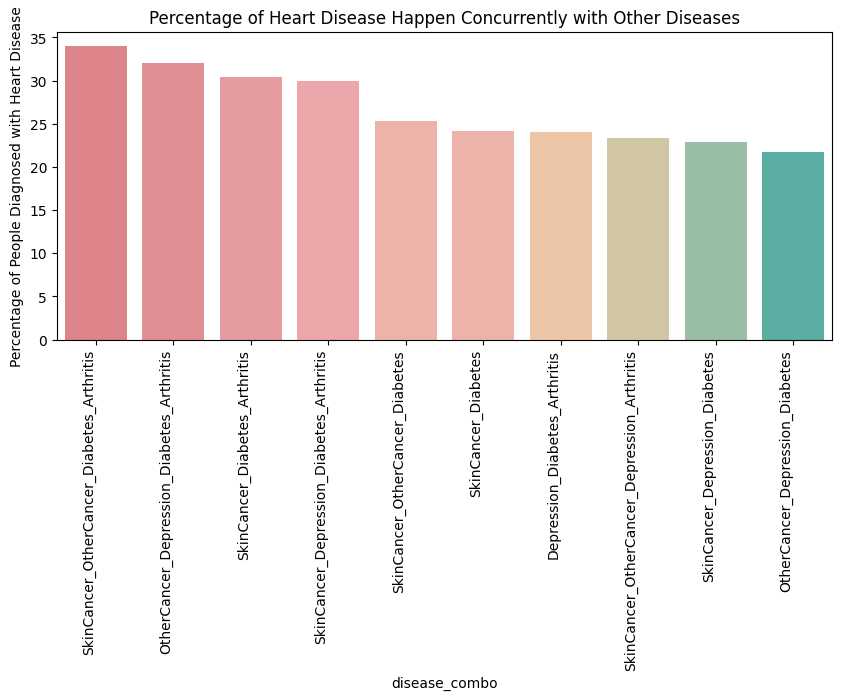

In [85]:
# set up custom color palette
colors = ["#EC747E","#EF818A","#F38E95","#F79CA0","#F8AAA0","#F8AAA0","#F8C59A","#D8CA9C","#93C3A3","#4CBCAA","#00B3B0","#00A6B5","#0099BB"]
customPalette = sns.set_palette(sns.color_palette(colors))

# Countplot of people in different age categories
top_percentage_heart_disease_result = percentage_heart_disease_result.head(10)
top_percentage_heart_disease_result['disease_combo'] = ['SkinCancer_OtherCancer_Diabetes_Arthritis','OtherCancer_Depression_Diabetes_Arthritis','SkinCancer_Diabetes_Arthritis','SkinCancer_Depression_Diabetes_Arthritis','SkinCancer_OtherCancer_Diabetes','SkinCancer_Diabetes','Depression_Diabetes_Arthritis','SkinCancer_OtherCancer_Depression_Arthritis','SkinCancer_Depression_Diabetes','OtherCancer_Depression_Diabetes']
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(ax=ax, data=top_percentage_heart_disease_result, x='disease_combo', y='percentage')
ax.set_title('Percentage of Heart Disease Happen Concurrently with Other Diseases')
ax.set_ylabel('Percentage of People Diagnosed with Heart Disease')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

**Takeaway**
* from percentage_heart_disease_result and the graph above, we can see a trend that people with more number of accompanying of diseases are more likely to also have heart disease (note there is no causal relation here). Therefore, we decided to calculate the number of accompanying diseases each people have and plot it against the status of heart disease.

Text(0.5, 0, 'Number of Accompanying Disease')

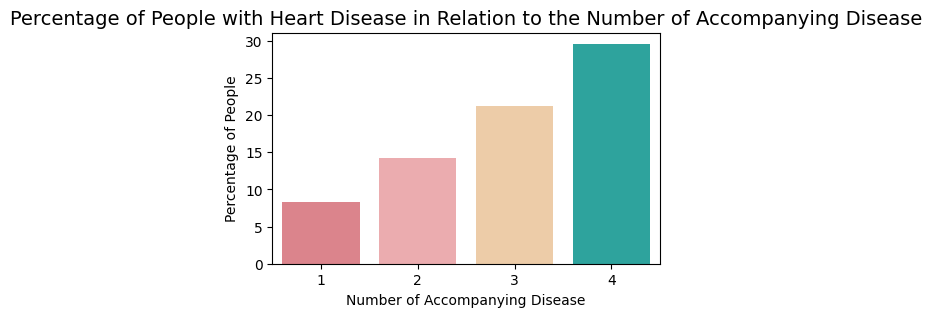

In [86]:
# We can see from percentage_heart_disease_result that people diagnoised with more types of diseases are more likely to have heart disease
# Therefore, we want to count the number of concurrent diseases in percentage_heart_disease_result and plot it

# mapping 'Yes' and 'No' to boolean values
Boolean_mapping= {'No':False,'Yes':True}
disease = ['Skin_Cancer',	'Other_Cancer',	'Depression',	'Diabetes',	'Arthritis']
for d in disease:
  percentage_heart_disease_result[d] = percentage_heart_disease_result[d].map(Boolean_mapping)

# create 'number_of_disease_count'
percentage_heart_disease_result['number_of_disease'] = percentage_heart_disease_result[['Skin_Cancer',	'Other_Cancer',	'Depression',	'Diabetes',	'Arthritis']].sum(axis=1)
percentageHD_numberofDisease = percentage_heart_disease_result.groupby(by=['number_of_disease'], as_index=False).sum()
percentageHD_numberofDisease['percentage'] = percentageHD_numberofDisease['disease_combo_hdYes_count'] / percentageHD_numberofDisease['disease_combo_hdAll_count'] * 100

# set color palette for the following graphs
colors = ["#EA7580","#F6A1A5","#F8CD9C","#1BB6AF","#088BBE","#172869"]
customPalette = sns.set_palette(sns.color_palette(colors))

# Countplot of People with Different General Health Status
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=percentageHD_numberofDisease, x='number_of_disease', y='percentage')

# format axes
ax.set_title('Percentage of People with Heart Disease in Relation to the Number of Accompanying Disease', fontsize=14)
ax.set_ylabel('Percentage of People')
ax.set_xlabel('Number of Accompanying Disease')

**Takeaway:**

* There is a trend that people with more accompanying diseases are more likely to also have heart disease. This is reasonable as people have more diseases are also more likely to be in poorer health condition and older in age.

####Heart_Disease Status in Relation to Health Behaviors

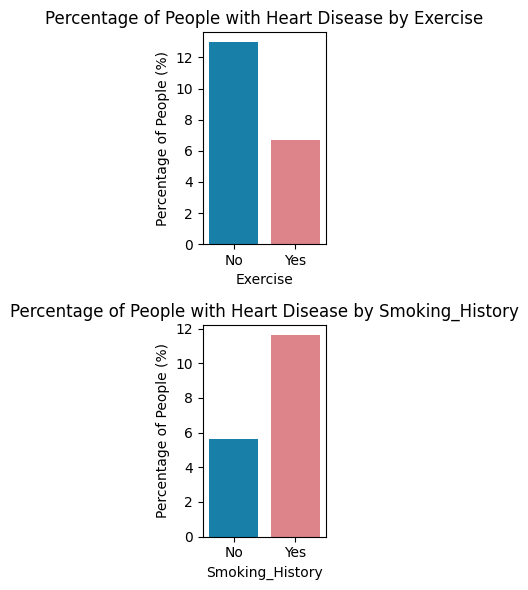

In [87]:
# set color palette
colors = ["#008AC0","#EC747E"]
customPalette = sns.set_palette(sns.color_palette(colors))

# calculate the percent of people diagnosed of heart disease in each subcategories of Exercise
percent = pdf.groupby('Exercise', as_index=False)['Heart_Disease'].value_counts(normalize=True)
pc_by_exercise = pd.DataFrame(percent)
pc_by_exercise = pc_by_exercise[pc_by_exercise['Heart_Disease'] == 'Yes']
pc_by_exercise['Percentage'] = pc_by_exercise['proportion'] * 100

# calculate the percent of people diagnosed of heart disease in each subcategories of Smoking_History
percent = pdf.groupby('Smoking_History', as_index=False)['Heart_Disease'].value_counts(normalize=True)
pc_by_smoke = pd.DataFrame(percent)
pc_by_smoke = pc_by_smoke[pc_by_smoke['Heart_Disease'] == 'Yes']
pc_by_smoke['Percentage'] = pc_by_smoke['proportion'] * 100

# plot
pcs = [pc_by_exercise, pc_by_smoke]
xlabels = ['Exercise', 'Smoking_History']
fig, axes = plt.subplots(2, 1, figsize=(2,6))
for pc, ax, xlabel in zip(pcs, axes.flatten(), xlabels):
  sns.barplot(x=pc[xlabel].to_list(), y=pc['Percentage'].to_list(), ax=ax)

  # format axes
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Percentage of People (%)')
  ax.set_title(f'Percentage of People with Heart Disease by {xlabel}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

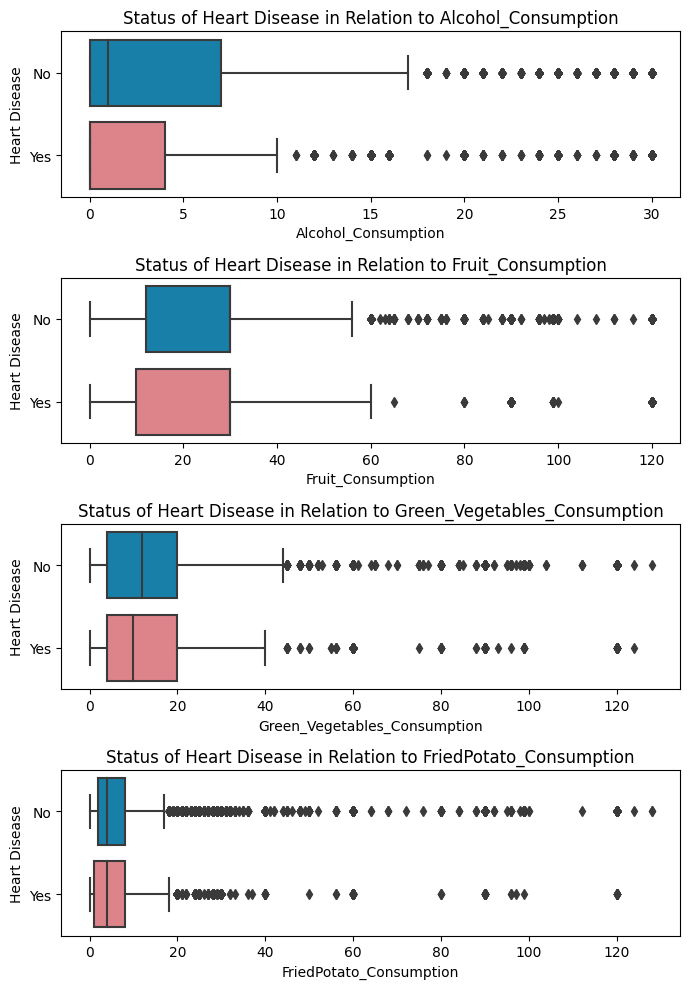

In [88]:
# create pdf_body_index dataframe from pdf to iterate the plotting
fig, axes = plt.subplots(4, 1, figsize=(7, 10))
pdf_diet = pdf[['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Heart_Disease']]

# plots for height, weight, BMI spread
for col, ax in zip(pdf_diet, axes.flatten()):

  # Plots
  sns.boxplot(data=pdf_diet, ax=ax, x=col, y ='Heart_Disease')

  # Set labels and title for the current subplot
  ax.set_xlabel(col)
  ax.set_ylabel('Heart Disease')
  ax.set_title(f'Status of Heart Disease in Relation to {col}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

**Takeaway:**
* People who **exercise** are slightly less likely to have heart disease

* Heart disease is more common in people who have **smoking history**
* Heart Disease is slightly less common among people with higher **fruit or green vegetables** consumption.


### 3.3.2 Correlation Matrix

#### Categorical Values Encoding

To draw the correlation matrix, we will firstly encode all the variables that contains strings values into numerical values. As shown below, there are 12 such categorical variables that we need to encode. Eight of them contains boolean values while the other four contains multiple classes.

In [89]:
#Select columns with dtype 'object' and calculate the number of unique values in each selected column
df.select_dtypes(include='object').nunique()

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

In [90]:
# encode for features containing binary values

## mapping 'No' in column to 0 and mapping 'Yes' to 1
Binary_mapping= {
    'No':0,
    'Yes':1
}

for col in ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']:
  df[col] = df[col].map(Binary_mapping)

# mapping 'Female' in Sex column to 0 and mapping 'Male' in Sex column to 1
Sex_mapping= {
    'Female':0,
    'Male':1
}

df['Sex']=df['Sex'].map(Sex_mapping)

In [91]:
# encode for features containing multiple values

## mapping string value in General_Health column to numerical value
health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
df['General_Health'] =  df['General_Health'].map(health_mapping)

# mapping for Checkup
# These data represent different frequencies of health check-ups, and they can be encoded as ordinal numeric features
# because there is a natural order among these categories, ranging from 'never checked' to 'frequently checked'.
check_up_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
}
df['Checkup'] = df['Checkup'].map(check_up_mapping)

# mapping for diabetes. Numerical values are ordered by the severity of diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
df['Diabetes'] = df['Diabetes'].map(diabetes_mapping)

In [92]:
#Encode the Age
#Create new features - Age Midpoint and Age Range to represent age interval

# Step 1: Replace '80+' in 'Age_Category' column with '80-100'
df['Age_Category'] = df['Age_Category'].replace({'80+': '80-100'})

# Step 2: Split the 'Age_Category' column into two new columns
new_columns = df['Age_Category'].str.split('-', expand=True)
new_columns.columns = ['Age_min', 'Age_max']

# Step 3: Convert the new columns to integers
new_columns['Age_min'] = new_columns['Age_min'].astype(int)
new_columns['Age_max'] = new_columns['Age_max'].astype(int)

# Step 4: Create new features - Age Midpoint and Age Range
new_columns['Age_Midpoint'] = (new_columns['Age_min'] + new_columns['Age_max']) / 2
new_columns['Age_Range'] = new_columns['Age_max'] - new_columns['Age_min']

# Step 5: Concatenate the new columns with the original dataframe
df_encoded = pd.concat([df, new_columns], axis=1)

# Step 6: Drop the original 'Age_Category' column
df_encoded = df_encoded.drop(['Age_Category','Age_min','Age_max'], axis=1)

In [93]:
df_encoded

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_Midpoint,Age_Range
0,0,0,3,0,0,0,0,0,0,1,...,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,72.0,4
1,1,3,4,0,1,0,0,0,1,0,...,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,72.0,4
2,2,3,4,1,0,0,0,0,1,0,...,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,62.0,4
3,3,0,4,1,1,0,0,0,1,0,...,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,77.0,4
4,4,2,4,0,0,0,0,0,0,0,...,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,90.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308849,3,4,1,0,0,0,0,0,0,...,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0,27.0,4
308770,308850,1,2,1,0,0,0,0,1,0,...,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0,67.0,4
308771,308851,3,1,1,0,0,0,1,1,0,...,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0,32.0,4
308772,308852,3,4,1,0,0,0,0,0,0,...,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0,67.0,4


#### Correlation Matrix before Feature Engineering

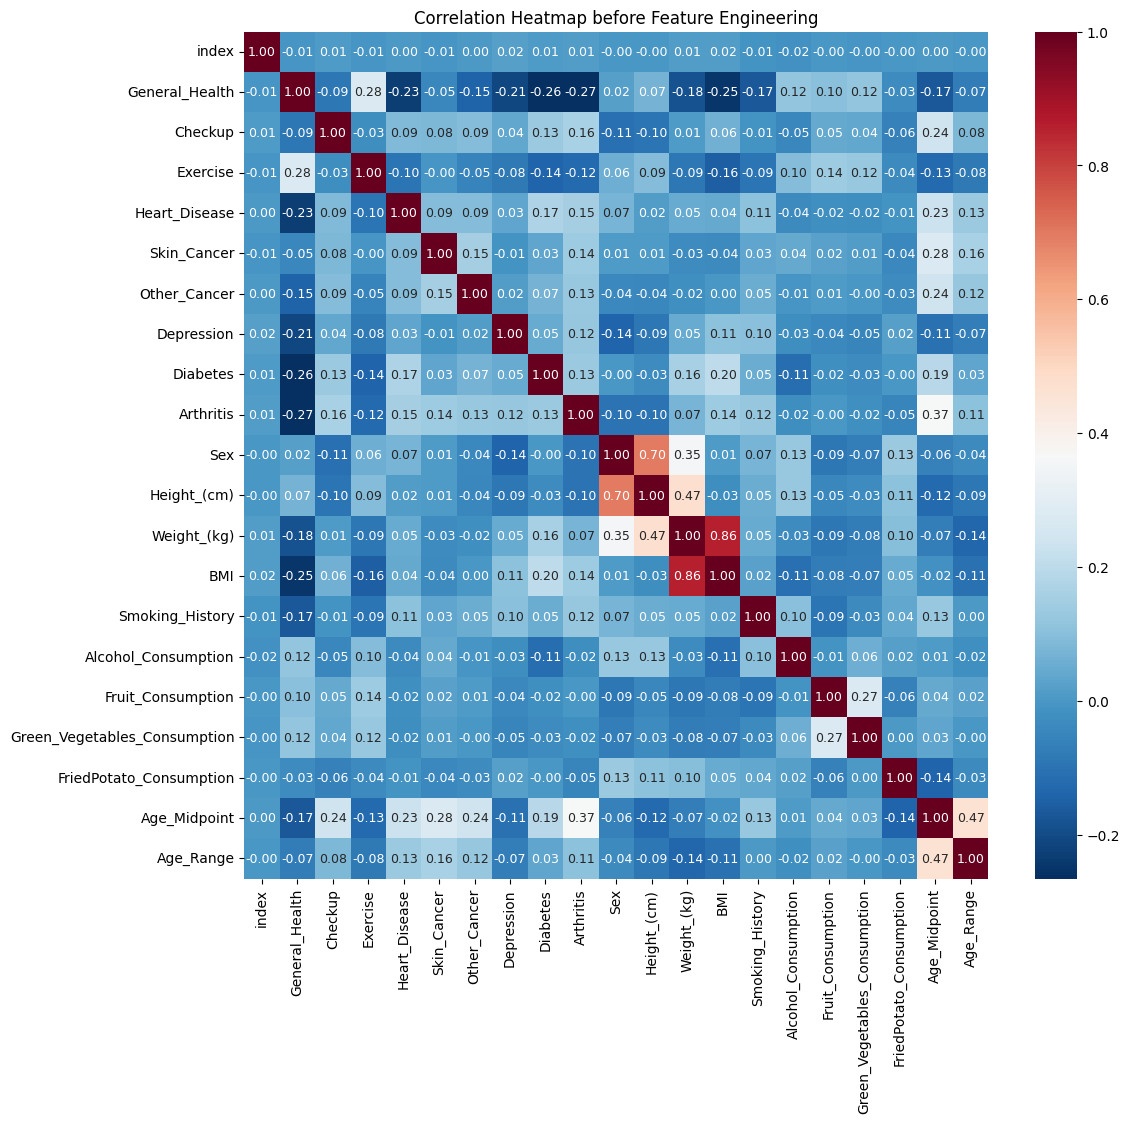

In [94]:
# Calculate the correlation matrix for Data
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.subplots(figsize=(12, 11))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 9}, cmap='RdBu_r', fmt=".2f")
plt.title("Correlation Heatmap before Feature Engineering")
plt.show()

#Part 4. Data Processing

In this section, we transform raw information into refined, structured format ready for analysis. We will leveraging different techniques to enhance data quality and importantly, perform feature engineering to reduce some high-correlated features.

## 4.1 Feature Engineering

In this section, we refine our dataset's features to extract deeper insights. To address th issue of multicollinearity among different feautres, our approach involves encoding age with enhanced granularity, unifying body metrics for clarity, harmonizing dietary habits, and recognizing the synergy between health and exercise. Each transformation aims to bolster predictive power while maintaining feature interpretability. The conscious choice to forgo PCA underscores our commitment to transparent, comprehensible features, laying a solid foundation for robust modeling and nuanced analysis.

In [95]:
# Encode diet features
# combining diet habit into one feature
# 0.5 wight for "healthy diet" and 1 weight for "unhealthy diet"
df_encoded['Healthy_Diet_Score'] = df['Fruit_Consumption'] * 0.5 + df_encoded['Green_Vegetables_Consumption'] * 0.5 - df_encoded['FriedPotato_Consumption']
df_encoded = df_encoded.drop(columns=['Fruit_Consumption', 'Green_Vegetables_Consumption','FriedPotato_Consumption'])

# Encode health score - general health  and exercise
df_encoded['Health_score'] = df_encoded['General_Health']/5 + df['Exercise']
df_encoded = df_encoded.drop(columns=['General_Health','Exercise'])

In [96]:
# Using the "Devine formula," which provides estimated ideal weight values for different genders and heights
def calculate_ideal_weight(height, gender):
    #for male
    if gender == 1:
        return 50 + 0.9 * (height - 152)
    #for female
    elif gender == 0:
        return 45.5 + 0.9 * (height - 152)
    else:
        # If gender is unknown or not applicable,  return 'None' to indicate that the calculation is not possible
        return None
df_encoded['Ideal_Weight'] = df_encoded.apply(lambda row: calculate_ideal_weight(row['Height_(cm)'], row['Sex']), axis=1)


In [97]:
#define BMI score according some professional report
def calculate_BMI_score(BMI):
    bmi_score = 0
    weight_score = 0

    # BMI score
    if BMI < 18.5:
        return 2  # Underweight
    elif 18.5 <= BMI <= 24.9:
        return 1  # Normal weight
    elif 25 <= BMI <= 29.9:
        return 2  # Overweight
    else:
        return 3  # Obesity
df_encoded['BMI_score']=df_encoded.apply(lambda row: calculate_BMI_score(row['BMI']), axis=1)

#calculate health score which incorprate weight, height, BMI

def calculate_Body_Index(weight, ideal_weight, bmi_score):
    #Discrepancy between actual weight and ideal weight"
    weight_diff = weight - ideal_weight

    # caulate weight score
    if weight_diff > 10:
        weight_score = 2  #Being more than 10 kilograms above ideal weight
    elif weight_diff < -10:
        weight_score = 1.5  #Being more than 10 kilograms below ideal weight
    else:
        weight_score = 1  #Weight within or close to the ideal weight range

    # caulate health score
    total_score = bmi_score + weight_score
    return total_score
df_encoded['Body_Index']=df_encoded.apply(lambda row: calculate_Body_Index(row['Weight_(kg)'],row['Ideal_Weight'],row['BMI_score']), axis=1)


In [98]:
#drop weight,BMI,height,BMI score, Ideal_Weight
df_encoded=df_encoded.drop(['Weight_(kg)','BMI','Height_(cm)','BMI_score','Ideal_Weight'], axis=1)

#rename
df_encoded = df_encoded.rename(columns={'No': 'No_Diabetes', 'Yes': 'Yes_Diabetes','No, pre-diabetes or borderline diabetes':'No_Prediabetes','Yes, but female told only during pregnancy':'Yes_Only_pregnancy'})

#reset_index
df_encoded.reset_index(inplace=True,drop=True)

df_encoded.head()

,index,Checkup,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,Alcohol_Consumption,Age_Midpoint,Age_Range,Healthy_Diet_Score,Health_score,Body_Index
0,0,3,0,0,0,0,0,1,0,1,0.0,72.0,4,11.0,0.0,3.5
1,1,4,1,0,0,0,1,0,0,0,0.0,72.0,4,11.0,0.6,4.0
2,2,4,0,0,0,0,1,0,0,0,4.0,62.0,4,-8.5,1.6,5.0
3,3,4,1,0,0,0,1,0,1,0,0.0,77.0,4,22.0,1.0,4.0
4,4,4,0,0,0,0,0,0,1,1,0.0,90.0,20,6.0,0.4,2.0


## 4.2 Correlation Matrix after Feature Engineering

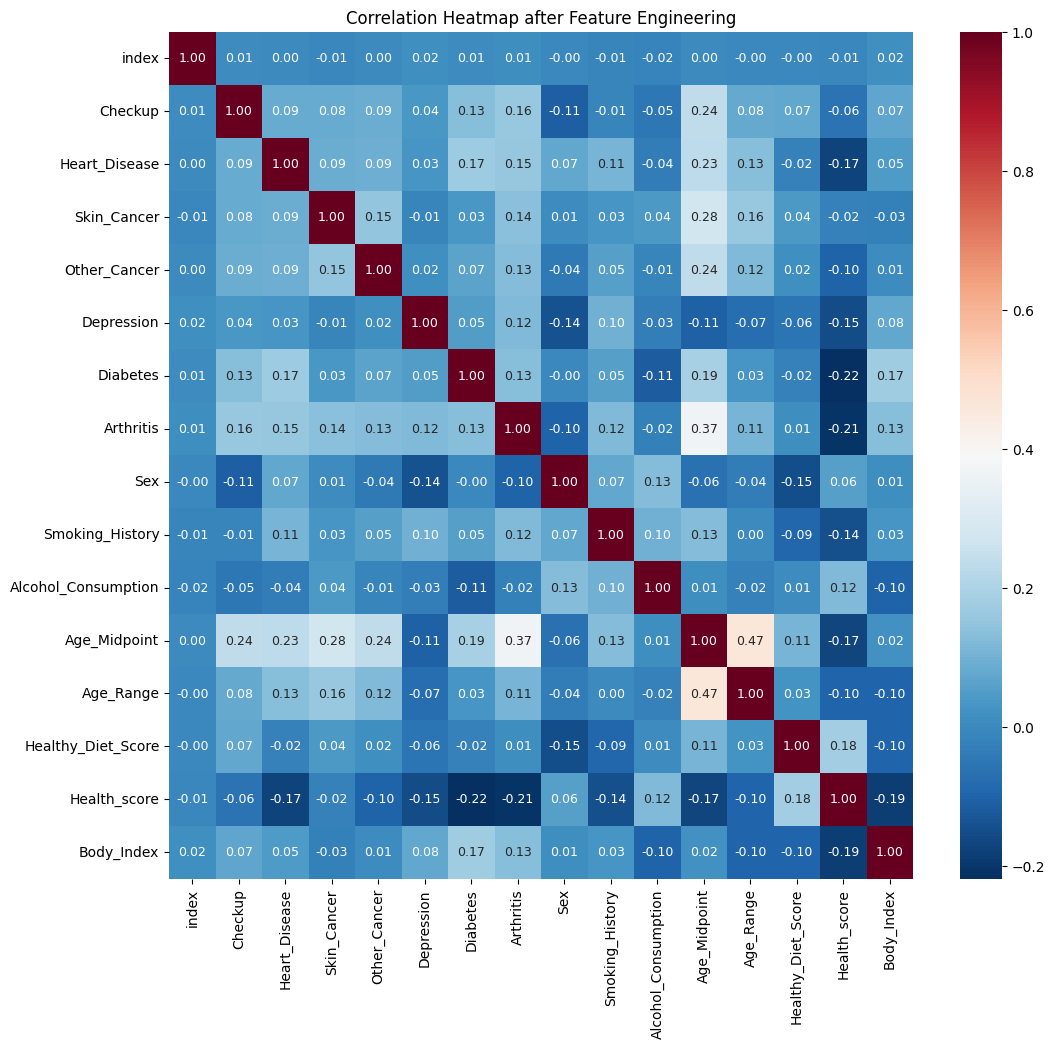

In [99]:
# Calculate the correlation matrix for Data
correlation_matrix = df_encoded.corr()
# Create a heatmap
plt.figure(figsize=(12, 11))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 9}, cmap='RdBu_r', fmt=".2f")
plt.title("Correlation Heatmap after Feature Engineering")
plt.show()

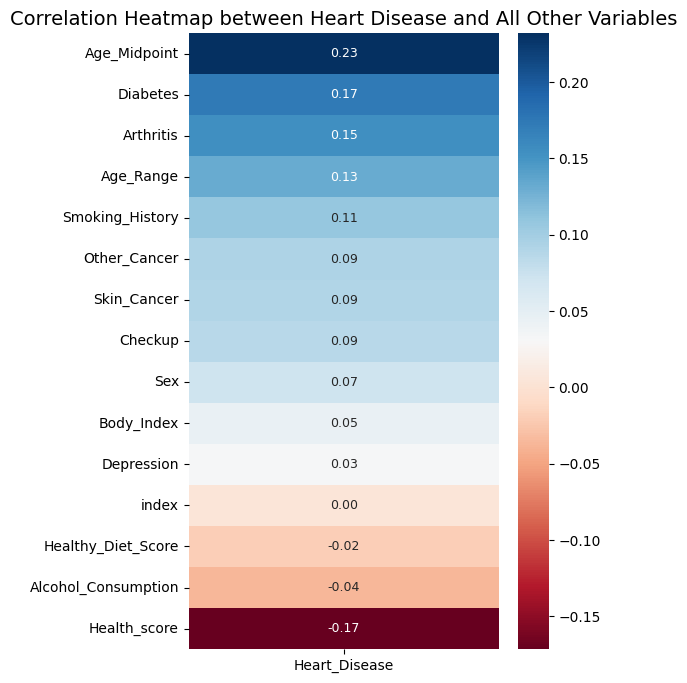

In [100]:
# Create correlation heatmap between heart disease and all other features
HD_corr_col = correlation_matrix[['Heart_Disease']].sort_values(by=['Heart_Disease'], ascending=False).drop('Heart_Disease')

fig, ax = plt.subplots(figsize=(5, 8))
sns.heatmap(HD_corr_col, ax=ax, cmap="RdBu", annot=True, annot_kws={"size": 9}, fmt='.2f')
ax.set_title('Correlation Heatmap between Heart Disease and All Other Variables', fontsize=14)

plt.show()

**Takeaway:**
* Just as we suggested before in the EDA section, Age seems to be a major factor in terms of heart disease. At the same time, Diabetes and Arthritis are also highly correlated to heart disease. In the above feature engineering section, we attempted to remove such high correlation within each features.

# Part 5. Modeling

Now, having successfully navigated through the data cleaning, pre-processing, and feature engineering phases, 🚀 we find ourselves at the exciting threshold of modeling! 🧠💻 Armed with a well-prepared dataset, we are poised to unravel the complex relationships between heart disease and its myriad influencing factors. Let the modeling adventure begin! 🌟📊

## 5.1 Address Data Imbalance Issue

Before we delve into building our predictive model, we encounter the challenge of imbalanced data.  To navigate this issue, we've explored various strategies, including oversampling, downsampling, and training on unbalanced data. After careful consideration, **downsampling** emerged as the optimal choice to strike a balance and ensure our model's effectiveness.

In [101]:
#split train and test dataset(90%data for train , 10% data for test)

df2=df_encoded.copy().reset_index(drop=True)
X = df2.drop('Heart_Disease', axis=1)
y = df2['Heart_Disease']#label
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)


In [102]:
#undersampling to balance data
under_sampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)


In [103]:
#Standardize the data
#standardization is the process of scaling features to have a unit variance by subtracting the mean and dividing by the standard deviation.
#Instantiate a standardization transformer----StandardScaler
scaler = StandardScaler()
#Fit and transform the training dataset
X_train_scaled = scaler.fit_transform(X_train_resampled)
#Apply transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [104]:
y_train.value_counts()

0    255465
1     22431
Name: Heart_Disease, dtype: int64

In [105]:
y_train_resampled.value_counts() # balanced label distribution

0    22431
1    22431
Name: Heart_Disease, dtype: int64

In [106]:
y_test.value_counts() # the test data count doesn't matter much

0    28338
1     2540
Name: Heart_Disease, dtype: int64

## 5.2 K-means Clustering

In [107]:
# we  use t-Distributed Stochastic Neighbor Embedding (t-SNE) to reduce dimensionality
# for the purpose of k-clustering visualization


# Fit t-SNE to the high-dimensional data
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train_scaled) # this takes about 10 mins due to our large dataset

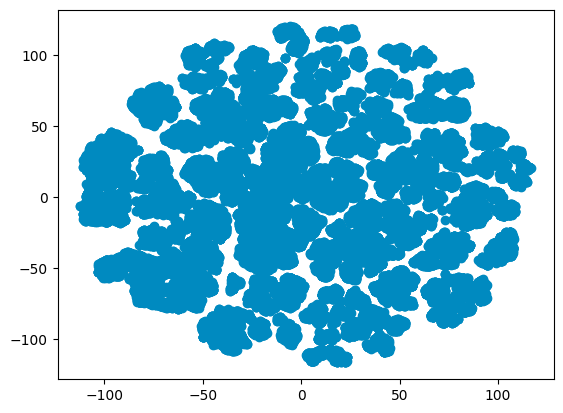

In [108]:
plt.scatter(X_tsne[:,0],X_tsne[:,1])

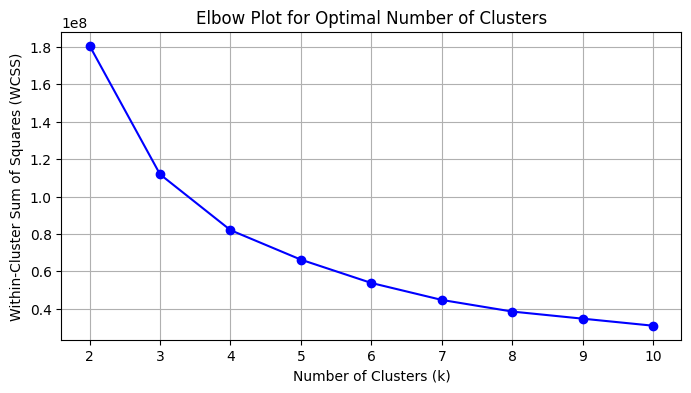

In [109]:
# for k ranges from 2 to 10, fit on "features" to generate an elbow plot

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=0)
    kmeans.fit(X_tsne)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(2, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

In [110]:
# Refit using the "elbow" number 4
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, n_init=5, random_state=0)
df2['cluster'] = kmeans_optimal.fit(X_tsne)

# Examine the cluster centers
cluster_centers = kmeans_optimal.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

# Examine the count of data points in each cluster
cluster_counts = df2['cluster'].value_counts()
print("\nCluster Counts:")
print(cluster_counts)

Cluster Centers:
[[-59.962708  31.352413]
 [ 59.21891  -30.406454]
 [ 28.339489  60.605095]
 [-31.815395 -55.660652]]

Cluster Counts:
KMeans(n_clusters=4, n_init=5, random_state=0)    308774
Name: cluster, dtype: int64


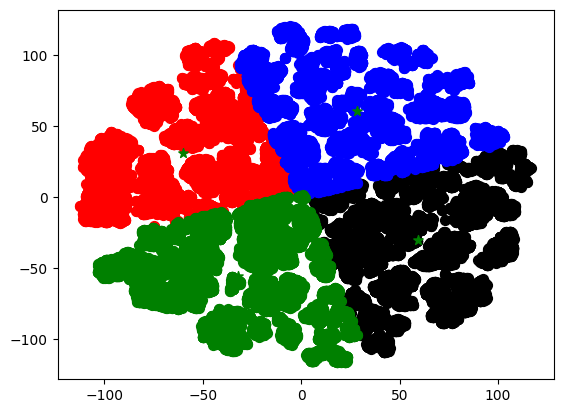

In [111]:
# Plotting along with the Centroids
clust0 = np.array([x for i, x in enumerate(X_tsne) if kmeans_optimal.labels_[i] == 0])
clust1 = np.array([x for i, x in enumerate(X_tsne) if kmeans_optimal.labels_[i] == 1])
clust2 = np.array([x for i, x in enumerate(X_tsne) if kmeans_optimal.labels_[i] == 2])
clust3 = np.array([x for i, x in enumerate(X_tsne) if kmeans_optimal.labels_[i] == 3])

plt.scatter(clust0[:, 0], clust0[:, 1], c='red', marker='o', s=50)
plt.scatter(clust1[:, 0], clust1[:, 1], c='black', marker='o', s=50)
plt.scatter(clust2[:, 0], clust2[:, 1], c='blue', marker='o', s=50)
plt.scatter(clust3[:, 0], clust3[:, 1], c='green', marker='o', s=50)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='*', s=50, c='g')

## 5.3 Build the models

To optimize its performance, we employ **grid search** to meticulously explore hyperparameter combinations and identify the ideal configuration.

### 5.3.1  Baseline Model: Logistic Regression

Logistic regression is a fitting choice for predicting heart disease due to its suitability for binary classification tasks. Given our objective to discern the presence or absence of heart disease, logistic regression's ability to model the probability of a binary outcome aligns seamlessly with our predictive goals.

In [112]:
#Prepare a hyperparameter grid for search
param_grid = {
    'solver': ['saga'],
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.01, 0.1, 1],  #Reciprocal of regularization strength
    'max_iter': [100,200]  #Maximum number of iterations
}

#Create a logistic regression model instance
logreg = LogisticRegression()

# Use the F1 score as the scoring metric for grid search
grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train_resampled)

# Output the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best F1 score: {:.2f}".format(grid_search.best_score_))

#Train the model on the full training set using the best parameters
best_model1 = grid_search.best_estimator_

#Make predictions on the test set
y_pred = best_model1.predict(X_test_scaled)

#Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#alculate and output the F1 score on the test dataset
f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}".format(f1))

#Calculate and output the ROC-AUC score on the test dataset
roc_auc = roc_auc_score(y_test, best_model1.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC Score: {:.2f}".format(roc_auc))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best F1 score: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.71      0.82     28338
           1       0.20      0.78      0.31      2540

    accuracy                           0.72     30878
   macro avg       0.58      0.75      0.57     30878
weighted avg       0.91      0.72      0.78     30878

F1 Score: 0.31
ROC-AUC Score: 0.82


In [113]:
if best_model1.n_iter_ < best_model1.get_params()['max_iter']:
    print("Model has converged")
    print("Actual iterations: ", best_model1.n_iter_)
else:
    print("Model hasn't converged. Try increasing 'max_iter'.")

Model has converged
Actual iterations:  [15]


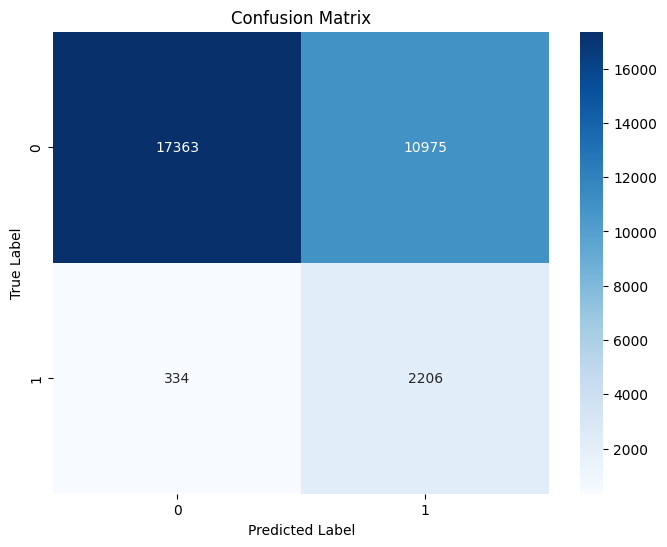

In [114]:

y_probs = best_model1.predict_proba(X_test_scaled)[:, 1]
#Set a new threshold to reduce the number of false negatives, even if it means accepting more false positives
#it is very important to balance the recall score and precision in predicting heart disease
new_threshold = 0.4
#Apply the new threshold for classification
y_pred_new_threshold = (y_probs >= new_threshold).astype(int)
#Calculate the confusion matrix
#y_pred = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_new_threshold)
#Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [115]:

#Calculate the recall (sensitivity) rate
recall = recall_score(y_test,y_pred_new_threshold)
print("Recall:", recall)
#Calculate the precision
precision = precision_score(y_test,y_pred_new_threshold )
print("Precision:", precision)

Recall: 0.868503937007874
Precision: 0.16736211213109778


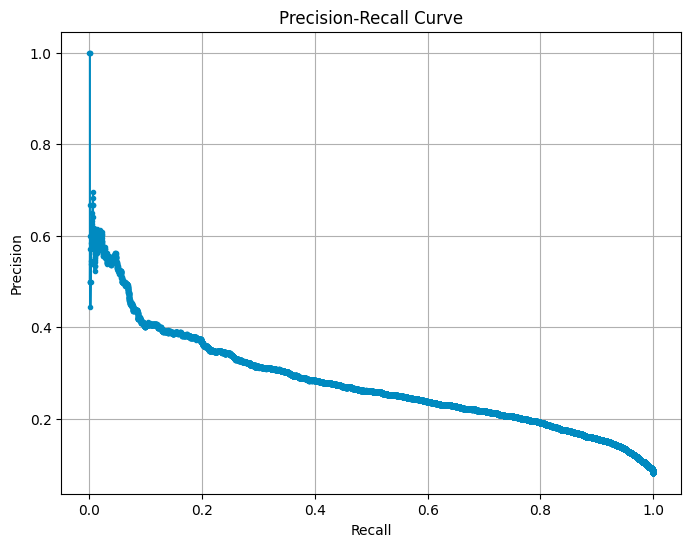

In [116]:
#Calculate precision and recall at different thresholds
#it is very important to balance the recall score and precision in predicting heart disease
from sklearn.metrics import precision_recall_curve
y_score = best_model1.predict_proba(X_test_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test,y_score)
#Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

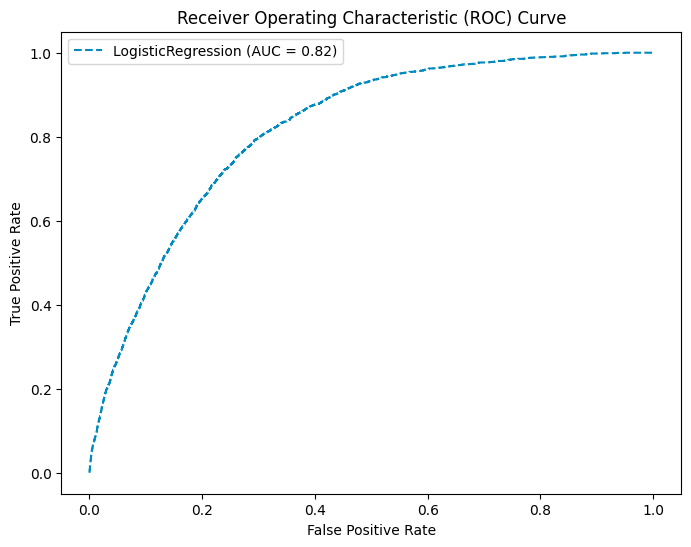

In [117]:

#Retrieve the probability values for the positive class
y_score = best_model1.predict_proba(X_test_scaled)[:, 1]
#Calculate the ROC (Receiver Operating Characteristic) curve
fpr, tpr, thresholds= roc_curve(y_test, y_score)
# Calculate the AUC
rf_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='LogisticRegression (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


**Takeaway:**

* The training results indicate an **accuracy** of 72%, suggesting that our model correctly predicts the presence or absence of heart disease in approximately three-quarters of cases.
* The **F1 score** of 0.32 highlights the balance between precision and recall, emphasizing that the model achieves a reasonable trade-off between minimizing false positives and false negatives.
* The **ROC**  score of 0.82 signifies a good discrimination ability, showcasing the model's effectiveness in distinguishing between positive and negative cases.
* A **recall** of 0.86 demonstrates the model's capability to identify a significant proportion of actual positive cases, while the **precision** of 0.16 underscores the challenge of minimizing false positives.
  * In the context of medical condition prediction, particularly for heart disease, prioritizing recall is crucial because it measures the ability of the model to correctly identify individuals with the condition among all those who actually have it.
* It's noteworthy that these results were obtained after exploring various combinations of feature engineering, with this particular combination demonstrating the best overall performance.
* Also note that, in our experiment of oversampling, logistic regression is the only one converged within short amount of time, but none of the metrics are better than the downsampling model we have above.

**Takeaway:**
* The most important features in logistic regression model is **Age_Midpoint**, **Sex**, and **Health_score**

### 5.3.2 Random Forest

We opted for the Random Forest model as an alternative approach due to its ability to handle complex relationships within the data and mitigate overfitting. Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions, providing robustness against noise and outliers. This makes it well-suited for our diverse dataset with various features and potential non-linear relationships. Additionally, Random Forest inherently performs feature importance ranking, offering insights into which features contribute significantly to the predictive performance. This highly aligns with our goal to select features that will lead to heart disease.

In [118]:
#Create a random forest classifier instance.
clf = RandomForestClassifier(random_state=42)

#Define the Hyperparameter grid
param_grid = {
    'n_estimators': [100,300,400],
    'max_depth': [10, 15,20],
    'min_samples_split': [5, 10]
}

## Use the F1 score as the scoring metric for grid search
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='f1', verbose=1)

#Train GridSearchCV on the training set
grid_search.fit(X_train_resampled, y_train_resampled)

#Output the best parameters and F1-score
print("Best parameters: ", grid_search.best_params_)
print("Best F1 score: {:.2f}".format(grid_search.best_score_))

#Use the model with the best parameters to make predictions on the test set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Caulate F1 score on test dataset
f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}".format(f1))

# Caulate ROC-AUC on test dataset
y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score on Test Set:", roc_auc)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 400}
Best F1 score: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.69      0.81     28338
           1       0.19      0.82      0.31      2540

    accuracy                           0.70     30878
   macro avg       0.58      0.75      0.56     30878
weighted avg       0.91      0.70      0.77     30878

F1 Score: 0.31
ROC-AUC Score on Test Set: 0.8285411119872984


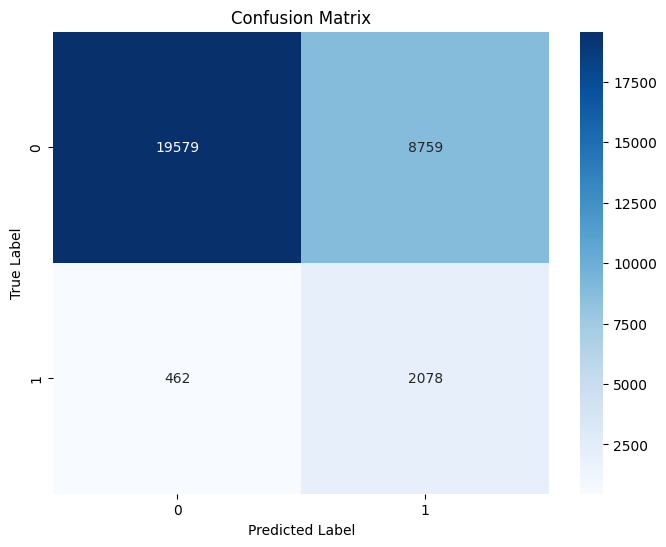

In [119]:

# Make predictions on the test set
y_pred = best_clf.predict(X_test)
#Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [120]:
#Calculate the recall (sensitivity) rate
recall = recall_score(y_test,y_pred )
print("Recall:", recall)
precision = precision_score(y_test,y_pred )
print("Precision:", precision)

Recall: 0.8181102362204724
Precision: 0.19175048445141643


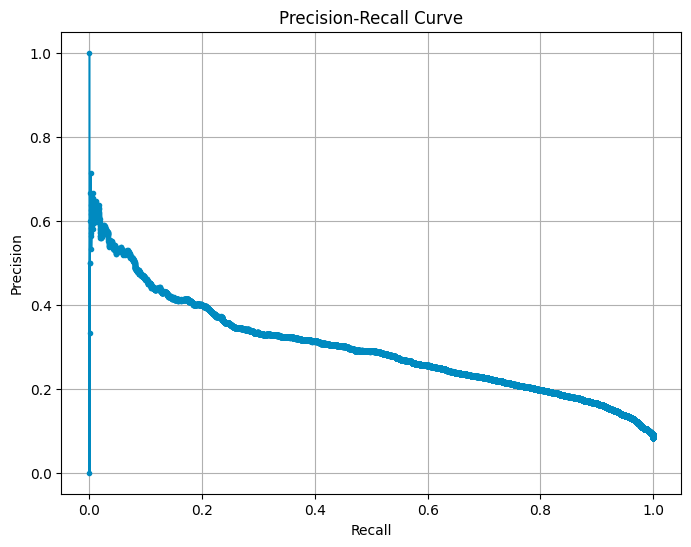

In [121]:
#Calculate precision and recall at different thresholds.

y_score = best_clf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test,y_score )
# plot recall-precision curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

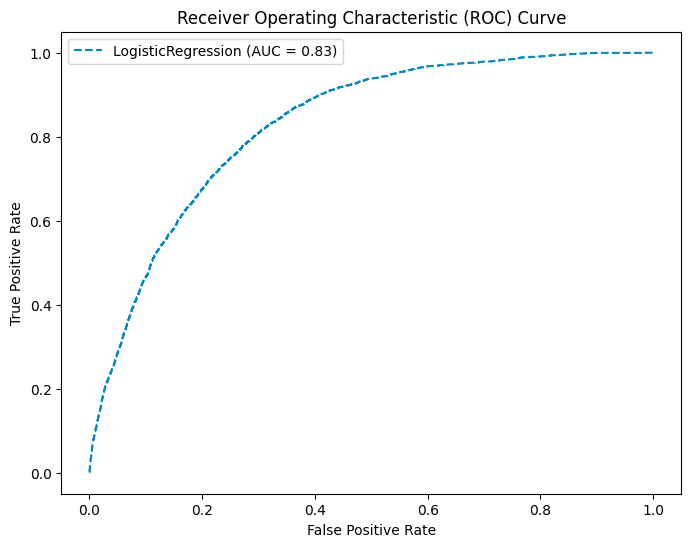

In [122]:
y_score = best_clf.predict_proba(X_test)[:, 1]  #Retrieve the probability values for the positive class
#Calculate the ROC (Receiver Operating Characteristic) curve
fpr, tpr, thresholds= roc_curve(y_test, y_score)
# Calculate the AUC
rf_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='LogisticRegression (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


* **Accuracy:**
Achieved an accuracy of 71%, indicating that approximately 71% of predictions were correct.
* **F1 Score:**
F1 score of 0.31, which balances precision and recall. It highlights the trade-off between correctly identifying positive instances (heart disease cases) and minimizing false positives.
* **ROC Score:**
ROC score of 0.83, suggesting a reasonably good ability to distinguish between individuals with and without heart disease.
* **Recall (True Positive Rate):**
Recall of 0.81, emphasizing the model's effectiveness at capturing instances of heart disease. This is crucial for our goal of identifying individuals at risk.
* **Precision:**
Precision of 0.19, indicating a relatively high rate of false positives. While the model captures many cases of heart disease, it also predicts some false positives.
* Overall, the random forest model achieved a relative high performance as the logistic regression but a relatively high rate of false positives.

### 5.3.3 xgboost

XGBoost, an ensemble learning method, has gained popularity for its ability to deliver robust results in classification tasks. It excels in handling complex relationships within the data, providing high predictive accuracy, and offering flexibility in fine-tuning hyperparameters. Our decision to employ XGBoost in predicting heart disease is rooted in its proven performance across diverse datasets. The following sections delve into the intricacies of our XGBoost model, exploring its strengths, outcomes, and its role in contributing to our overarching goal of accurate heart disease prediction.

In [123]:
#Initialize the XGBClassifier
xgb_model = XGBClassifier()

# Define the Hyperparameter grid
param_grid = {
    'max_depth': [1,2,3],
    'n_estimators': [1000,1500,2000,2500],
    'learning_rate': [0.01, 0.1, 0.2]
}

#Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=3, verbose=1)

# train model
grid_search.fit(X_train_resampled, y_train_resampled)


#Output the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best F1 score: {:.2f}".format(grid_search.best_score_))


#Use the model with the best parameters to make predictions
best_model = grid_search.best_estimator_
y_pred= best_model.predict(X_test)

#Evaluate the model.
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#Calculate and output the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}".format(f1))
# Calculate and print the ROC-AUC score
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score on Test Set:", roc_auc)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 2000}
Best F1 score: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.71      0.82     28338
           1       0.20      0.81      0.32      2540

    accuracy                           0.72     30878
   macro avg       0.59      0.76      0.57     30878
weighted avg       0.91      0.72      0.78     30878

F1 Score: 0.32
ROC-AUC Score on Test Set: 0.8367900034621439


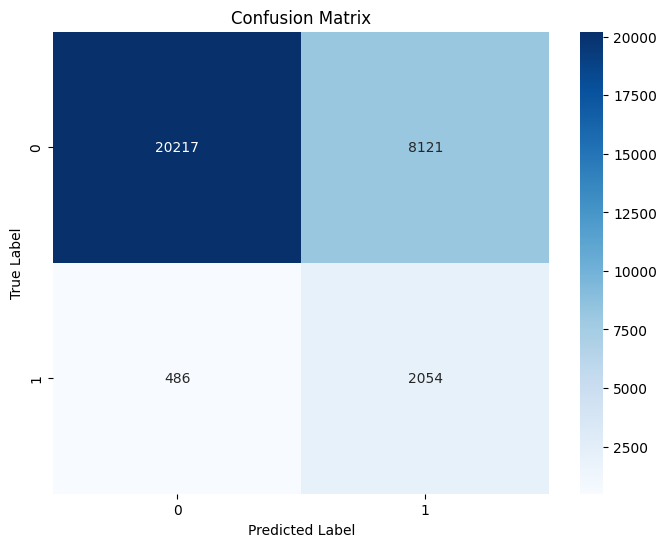

In [124]:

# make predicition on test dataset
y_pred =best_model.predict(X_test)
# Caulate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [125]:

# Caulate Recall
recall = recall_score(y_test,y_pred )
print("Recall:", recall)
precision = precision_score(y_test,y_pred )
print("Precision:", precision)

Recall: 0.8086614173228347
Precision: 0.20186732186732187


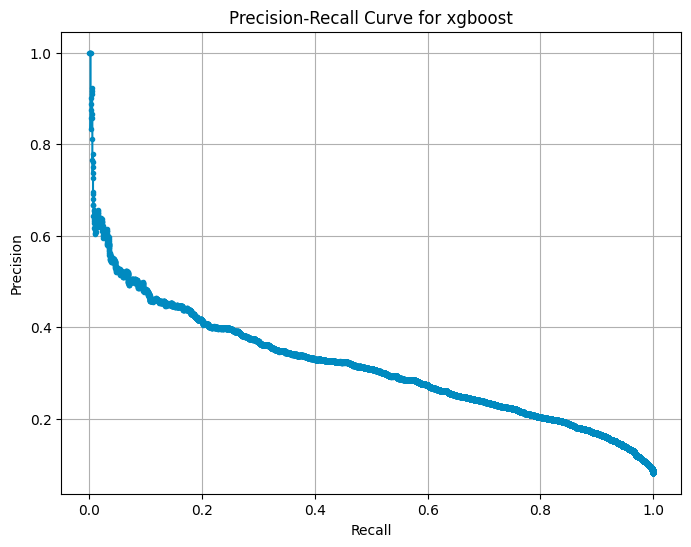

In [126]:
#Calculate precision and recall at different thresholds
y_score = best_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test,y_score)
# Plot recall-Precision Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for xgboost')
plt.grid(True)
plt.show()

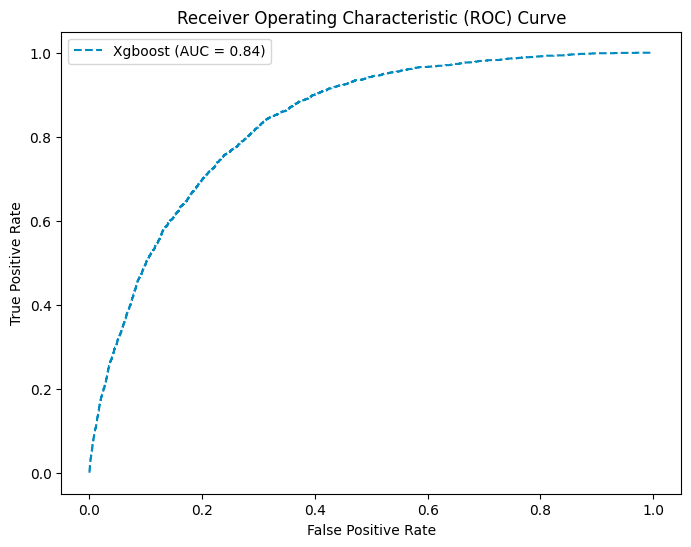

In [127]:
y_score = best_model.predict_proba(X_test)[:, 1]  #Retrieve the probability values for the positive class

# Caulate ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score)

# Caulate AUC
rf_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Xgboost (AUC = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

* **Accuracy:**
Achieved an accuracy of 73%, indicating that approximately 73% of predictions were correct.
* **F1 Score:**
F1 score of 0.33, balancing precision and recall. It reflects the trade-off between correctly identifying positive instances (heart disease cases) and minimizing false positives.
* **ROC Score:**
ROC score of 0.84, suggesting a reasonably good ability to distinguish between individuals with and without heart disease, similar to the Random Forest model.
* **Recall (True Positive Rate):**
Recall of 0.80, emphasizing the model's effectiveness at capturing instances of heart disease, similar to the Random Forest model.
* **Precision:**
Precision of 0.20, indicating a relatively high rate of false positives. While the model captures many cases of heart disease, it also predicts some false positives, similar to the Random Forest model.
* These results show consistency with the Random Forest model, indicating comparable performance between the two models.

## 5.4 Model Comparison

We now want to take a look at if the models are underfitting or overfitting by examining the **learning curve** of each model.

In [128]:
# define plotting function
def plot_learning_curve(estimator, X, y, model_name):
    train_sizes, train_scores, valid_scores = learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')

    plt.plot(train_sizes, valid_mean, 'o-', color='g', label='Validation Score')
    plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color='g')

    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title(f'Learning Curve of {model_name}')
    plt.legend()
    plt.show()


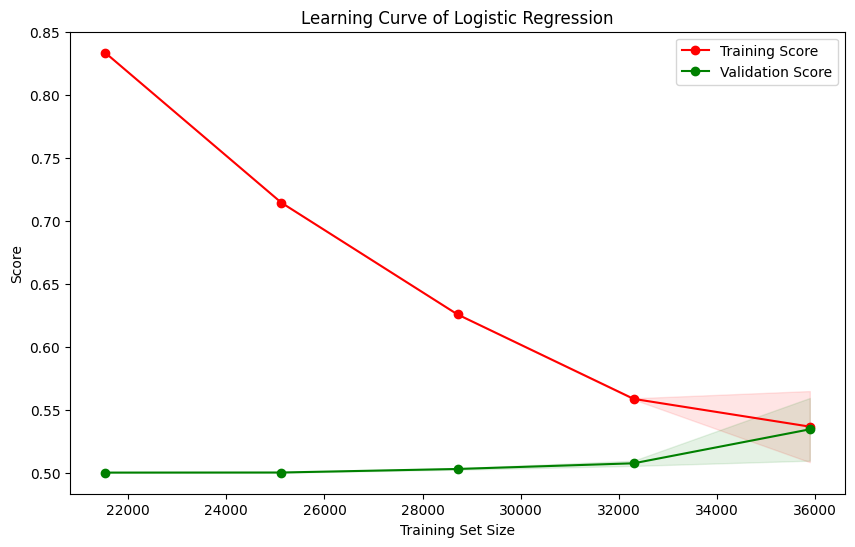

In [129]:
# logistic regression
plot_learning_curve(best_model1, X_train_resampled, y_train_resampled, 'Logistic Regression')

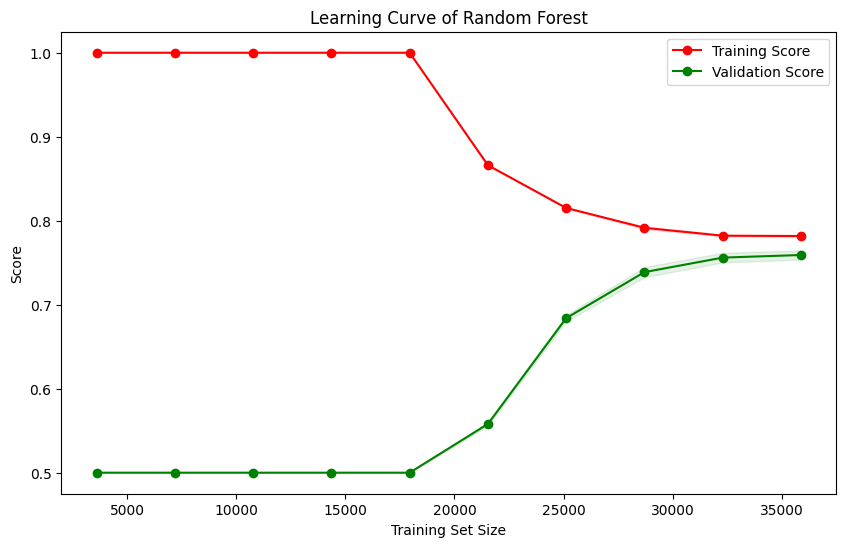

In [130]:
# random forest
plot_learning_curve(best_clf, X_train_resampled, y_train_resampled, 'Random Forest')

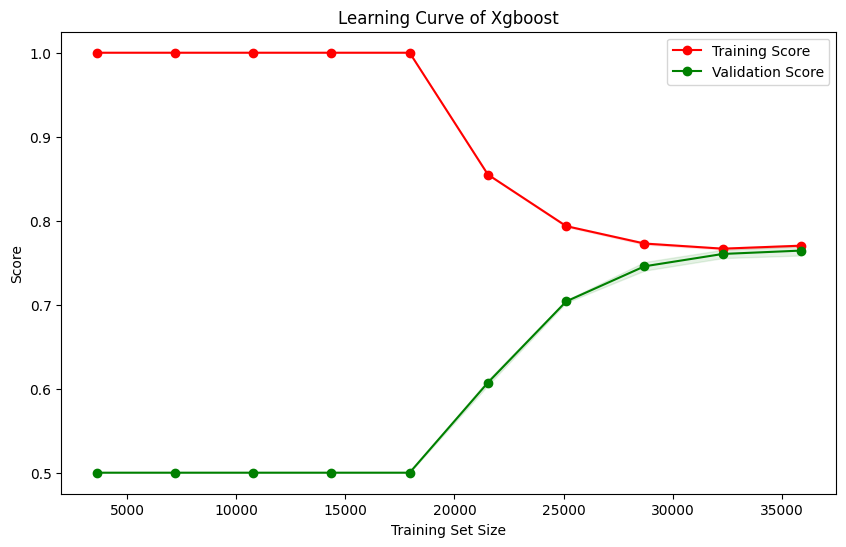

In [131]:
# xgboost
plot_learning_curve(best_model, X_train_resampled, y_train_resampled, 'Xgboost')

**Insights:**
* Losgistic Regression as our baseline model have training score and validation score converged at a relative lower point compared to the other two models. But it's not too low that we believe it's not underfitting.
* Both Random Forest and Xgboost have training score and validation score convered in the range 0.75-0.8 which shows that they are not underfitting nor overfitting.

We'd also like to know what are the most important features the model choose in their classification.

In [132]:
# Show important features in logistic regression model

# Get the coefficients and feature names
coefficients = best_model1.coef_[0]
feature_names = X.columns

# Create a DataFrame to display coefficients and their importance
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients to see the most important features
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
sorted_coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False).reset_index(drop=True)

# Display the DataFrame
print(sorted_coef_df)

                Feature  Coefficient  Absolute_Coefficient
0          Age_Midpoint     1.039638              1.039638
1                   Sex     0.411054              0.411054
2          Health_score    -0.383061              0.383061
3              Diabetes     0.316979              0.316979
4       Smoking_History     0.259710              0.259710
5             Arthritis     0.202274              0.202274
6            Depression     0.177472              0.177472
7             Age_Range    -0.162556              0.162556
8               Checkup     0.161170              0.161170
9   Alcohol_Consumption    -0.107439              0.107439
10         Other_Cancer     0.075544              0.075544
11           Body_Index     0.057006              0.057006
12          Skin_Cancer     0.024500              0.024500
13   Healthy_Diet_Score     0.015639              0.015639
14                index    -0.005053              0.005053


In [133]:
# Show important features in random forest model

# Get the feature importances and feature names
importances = best_clf.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance to see the most important features
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the DataFrame
print(sorted_importance_df)

                Feature  Importance
0          Age_Midpoint    0.335347
1          Health_score    0.187504
2              Diabetes    0.088708
3             Arthritis    0.079025
4                   Sex    0.047527
5       Smoking_History    0.044445
6               Checkup    0.040981
7             Age_Range    0.040715
8                 index    0.032302
9    Healthy_Diet_Score    0.030090
10  Alcohol_Consumption    0.028830
11         Other_Cancer    0.013167
12           Body_Index    0.011585
13          Skin_Cancer    0.011077
14           Depression    0.008698


In [134]:
# Show important features in xgboost model

# Access the feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(feature_importance_df)

                Feature  Importance
0          Age_Midpoint    0.285716
1              Diabetes    0.166665
2             Arthritis    0.161874
3          Health_score    0.106949
4       Smoking_History    0.086665
5                   Sex    0.077000
6               Checkup    0.032664
7            Depression    0.023091
8          Other_Cancer    0.015765
9   Alcohol_Consumption    0.014644
10          Skin_Cancer    0.008405
11           Body_Index    0.006844
12            Age_Range    0.005003
13                index    0.004402
14   Healthy_Diet_Score    0.004313


**Takeaway:**
* Age_Midpoint, Diabetes, Health_score, and Sex are the most common important features among all 3 models.
* This echoes what we've found in our EDA section that these factors have the most impact on heart_disease.

# Part 6. Conclusion


In conclusion, our journey to predict heart disease unveiled a nuanced interplay of factors influencing the outcomes. Contrary to initial expectations, the relationships between certain features and heart disease were intricate and often defied straightforward predictions. While we successfully integrated valuable features into our dataset, such as lifestyle, diet, and health metrics, the need for more granular information remains evident.

## Main Takeaway:


1.   We need to acknowledge that this dataset contains a good profile of indivisuals who are in general good health condition, have good diet, exercise habits.
2.   We've identified that some of the key factors contributing to the heart disease including age, general health status, and diabetes (though it is noteworthy that some of these factors are interrelated as well).
3. Xgboost model among the other two machine learning models demonstrated the best performance with a 72% accuracy and a 0.84 ROC score. Also, based on the learning curve, we believe it fits the dataset relatively well.   



## Future Suggestion



1.   **Fine-grained Data Collection and Incorporation:** Enhance the dataset by incorporating more granular and diverse health-related data. This could include genetic information, detailed medical histories, and specific lifestyle factors, providing a more comprehensive view of individual health profiles.
2.   **Feature Engineering Refinement:** Continuously refine and optimize feature engineering techniques. Explore additional ways to represent complex relationships between features, considering interaction terms and non-linear transformations to capture nuanced patterns in the data.
3.  **Validation on Diverse Populations:** Validate the predictive models on diverse populations to ensure generalizability. Consider factors such as ethnicity, socioeconomic status, and geographical variations to create more inclusive and equitable models.



# Index:  Previous PCA Attempts

---
But we understand that using PCA would lose the explainability of our models. So we ended up not using PCA


In [135]:
'''
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)


print(pca.explained_variance_ratio_)


X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])


X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])
'''

"\nfrom sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\nimport pandas as pd\n\n\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\n\npca = PCA(n_components=0.95)\npca.fit(X_train_scaled)\n\n\nprint(pca.explained_variance_ratio_)\n\n\nX_train_pca = pca.transform(X_train_scaled)\nX_test_pca = pca.transform(X_test_scaled)\n\n\nX_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])\n\n\nX_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])\n"